# With Covid Dataset

**Reasons to use decay rate from infectious disease to Game addiction:**
While it may seem unintuitive to apply the concept of infectious disease to addiction to video games, there are several similarities that make this comparison useful.

Firstly, both infectious diseases and addiction can spread from person to person through social interactions. For example, someone may become addicted to a video game after being introduced to it by a friend. Similarly, infectious diseases like COVID-19 can spread from person to person through close contact.

Secondly, both infectious diseases and addiction can have exponential growth rates. This means that the number of people affected can increase rapidly over time, and the spread can be difficult to control. In the case of addiction, the more people who become addicted to a particular game, the more likely it is that others will also become addicted.

Thirdly, both infectious diseases and addiction can be influenced by external factors, such as public health interventions or changes in social norms. For example, public health measures like social distancing and mask-wearing can slow the spread of infectious diseases, while awareness campaigns and community support can help individuals overcome addiction.

Therefore, by using the exponential decay rate from infectious disease data as a model for addiction reduction in a particular game, we can make predictions about the effectiveness of interventions and changes in social norms in reducing the spread of addiction. The decay rate for this covid dataset comes up to 0.012

<ipython-input-2-e4cbcdce3982>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variable['date'] = pd.to_datetime(df_variable['date'])
<ipython-input-2-e4cbcdce3982>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variable.dropna(inplace=True)
<ipython-input-2-e4cbcdce3982>:29: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
<ipython-input-2-e4cbcdce3982>:29: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


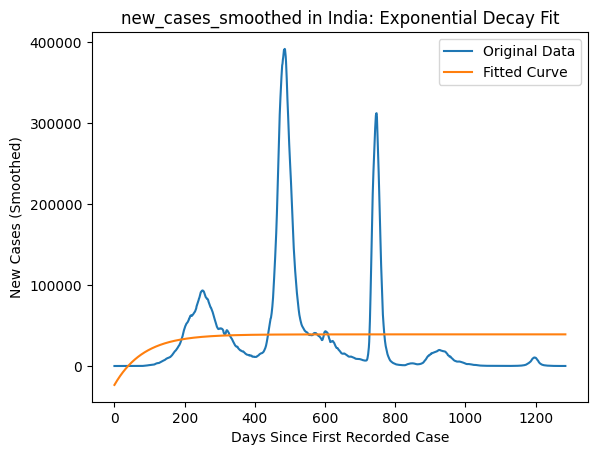

Decay Rate: 0.012039797911908293


In [ ]:
# Start
# covid dataset

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Dataset
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# We filter for specific country, ex-India
country = 'India'
df_country = df[df['location'] == country]

# Specific variable
variable = 'new_cases_smoothed'
df_variable = df_country[['date', variable]]

# We have to convert the date column to datetime format and set as index
df_variable['date'] = pd.to_datetime(df_variable['date'])
df_variable.set_index('date', inplace=True)

# Cleaning: we drop any rows with NaN values(if any)
df_variable.dropna(inplace=True)

# Exponential decay function
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# x and y data for the curve fit
x = np.arange(len(df_variable))
y = df_variable[variable].to_numpy()

# Exponential decay curve fit
popt, pcov = curve_fit(exponential_decay, x, y)

# Decay rate calculation
decay_rate = popt[1]

# Original data and the fitted curve plot
plt.plot(x, y, label='Original Data')
plt.plot(x, exponential_decay(x, *popt), label='Fitted Curve')
plt.xlabel('Days Since First Recorded Case')
plt.ylabel('New Cases (Smoothed)')
plt.title(f'{variable} in {country}: Exponential Decay Fit')
plt.legend()
plt.show()

print(f'Decay Rate: {decay_rate}')


# With Gaming Dataset

We use the following dataset: https://www.kaggle.com/datasets/jackogozaly/steam-player-data.
First we try to fit exponential decay rate with one of the most popular game PUBG. For PUBG this rate comes up to 0.7663.

We then, try to fit exponential decay rate for all unique games. We observe that some games show a negative exponential decay rate which basically means an exponential growth rate. We are particularly interested in games that show a postive decay rate only and hence consider only these games. Further we set a threshold value of 0.15 to ignore smaller decay rates. We take an average for all these games and reach the figure 0.65 which has been used as the Exponential Decay Rate in our Project.

<ipython-input-3-2cb27544b415>:21: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


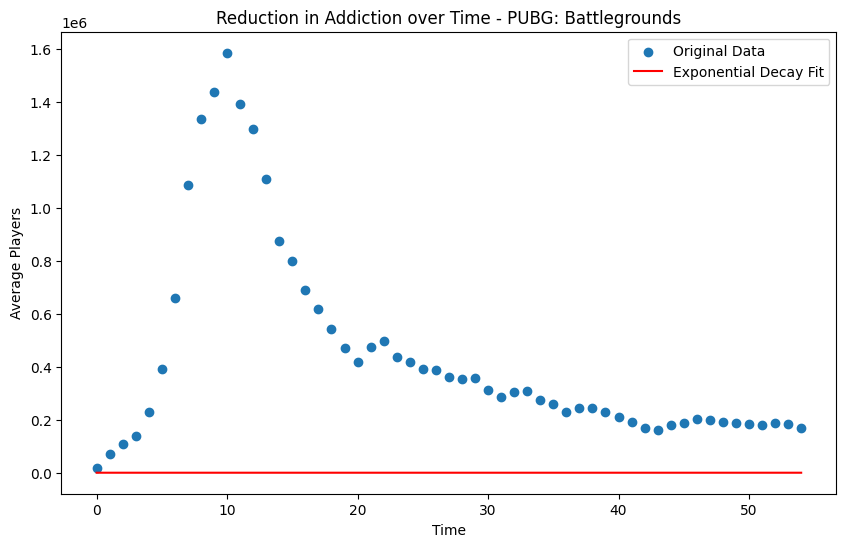

Decay Rate: 0.7663653638786007


In [ ]:
#With PUBG data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# dataset
data = pd.read_csv('/content/Valve_Player_Data.csv')

# We have to convert the date column to datetime format and set as index
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Soecific game: "PUBG: Battlegrounds"
pubg_data = data[data['Game_Name'] == 'PUBG: Battlegrounds']

# Ascending order sorting
pubg_data = pubg_data.sort_values('Date')

# Exponential decay function
def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

# We typically extract relevant columns for fitting the model
x = np.arange(len(pubg_data))  # x-axis represents time
y = pubg_data['Avg_players']   # y-axis represents average players (proxy for addiction)

# Exponential decay curve fit
popt, pcov = curve_fit(exponential_decay, x, y)

# Decay rate calculation
decay_rate = popt[1]

# Original data and the fitted curve plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, exponential_decay(x, *popt), 'r-', label='Exponential Decay Fit')
plt.xlabel('Time')
plt.ylabel('Average Players')
plt.title('Reduction in Addiction over Time - PUBG: Battlegrounds')
plt.legend()
plt.show()

print('Decay Rate:', decay_rate)

<ipython-input-4-a47024c3d0e6>:17: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


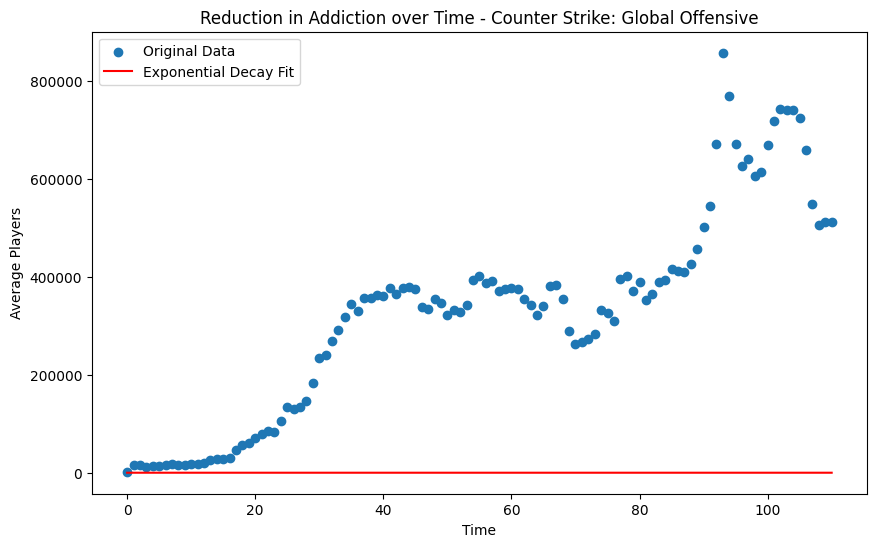

Game: Counter Strike: Global Offensive
Decay Rate: 0.7686163212445642
-----------------------------


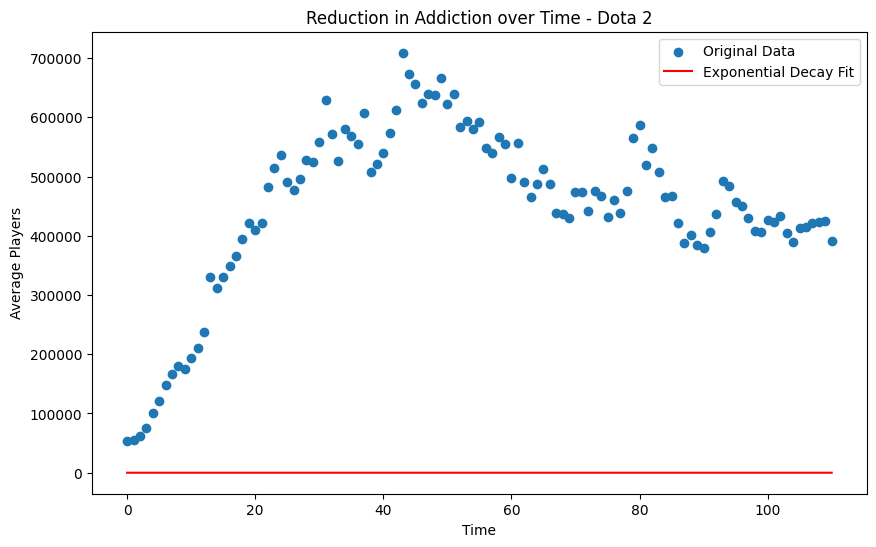

Game: Dota 2
Decay Rate: 0.7936041406674761
-----------------------------


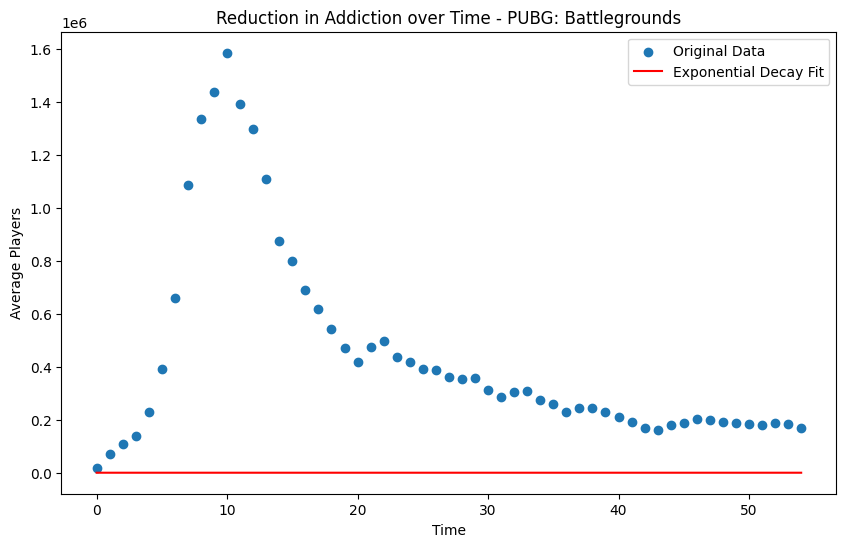

Game: PUBG: Battlegrounds
Decay Rate: 0.7663653638786007
-----------------------------


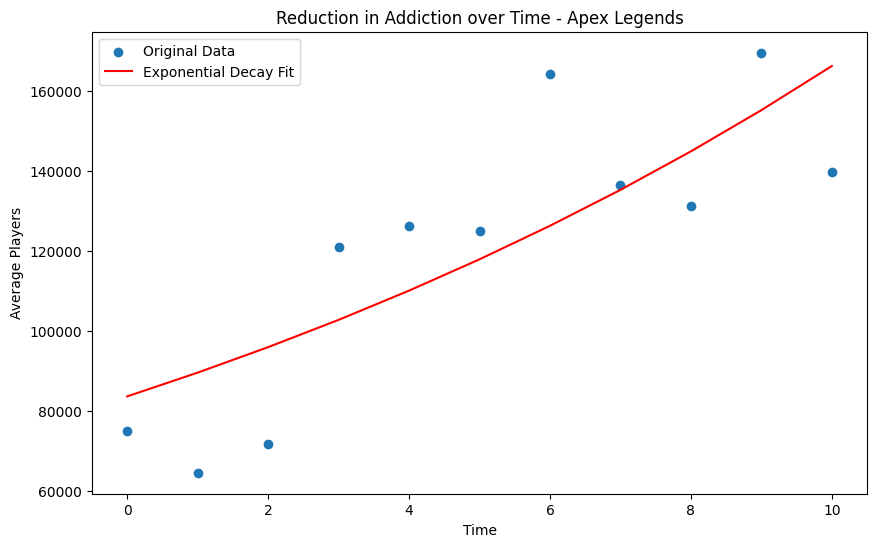

Game: Apex Legends
Decay Rate: -0.06875885754192057
-----------------------------


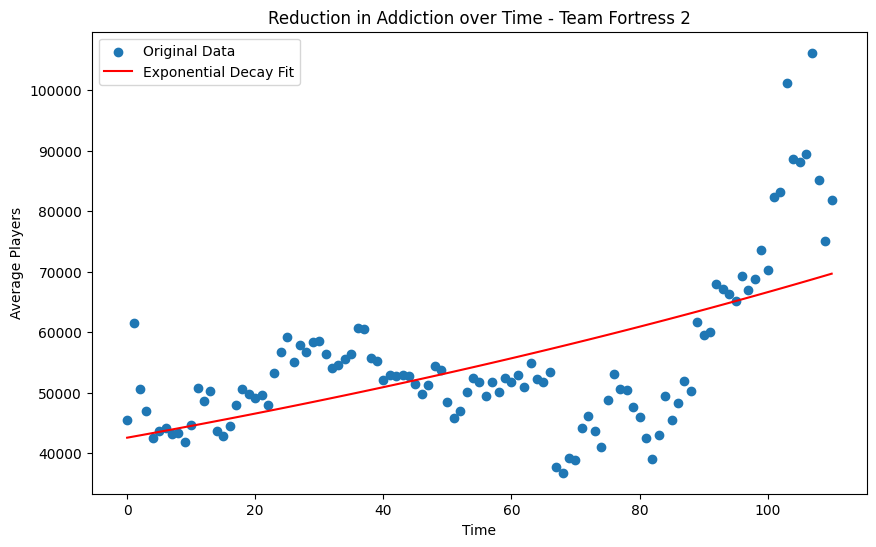

Game: Team Fortress 2
Decay Rate: -0.004480168981377974
-----------------------------


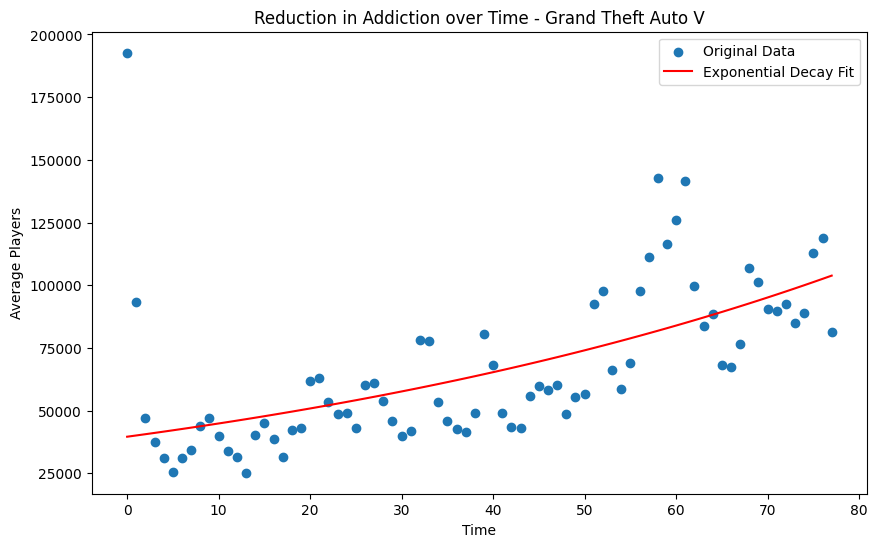

Game: Grand Theft Auto V
Decay Rate: -0.01252162144837434
-----------------------------


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


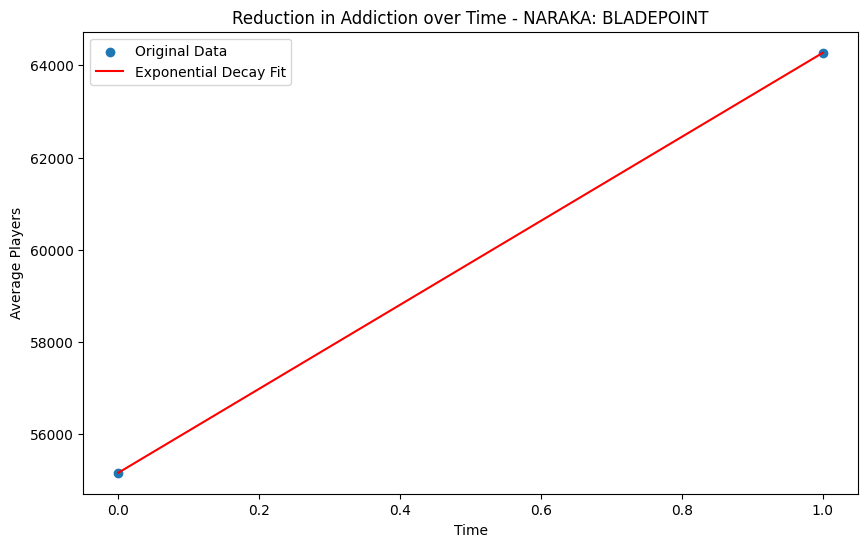

Game: NARAKA: BLADEPOINT
Decay Rate: -0.1527414996187236
-----------------------------


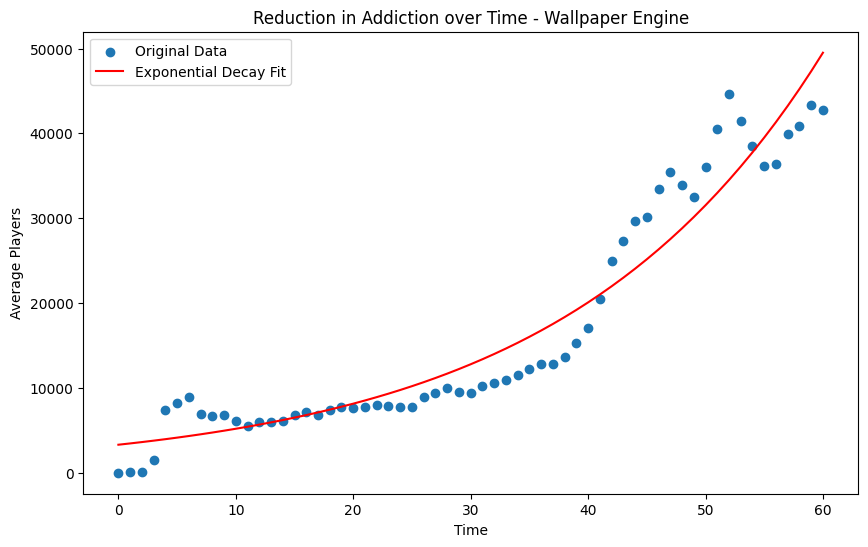

Game: Wallpaper Engine
Decay Rate: -0.045132648948920495
-----------------------------


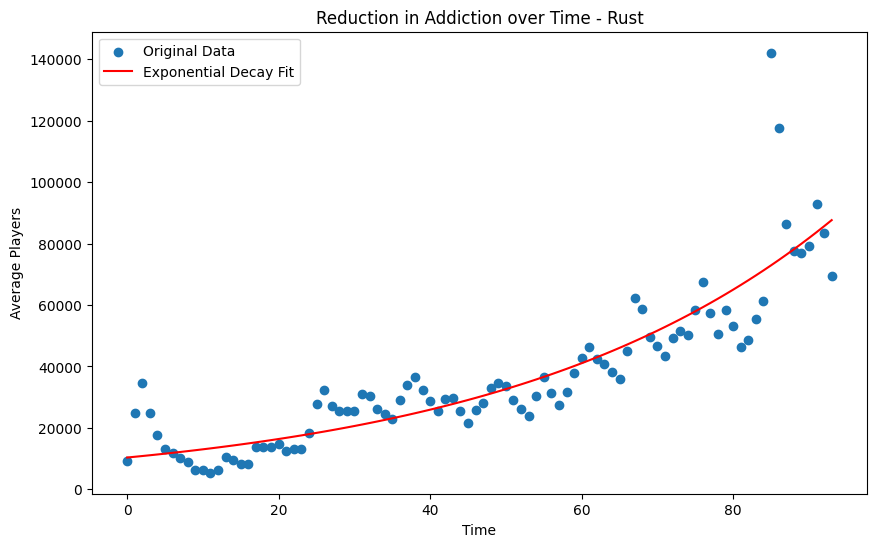

Game: Rust
Decay Rate: -0.02298522064144788
-----------------------------


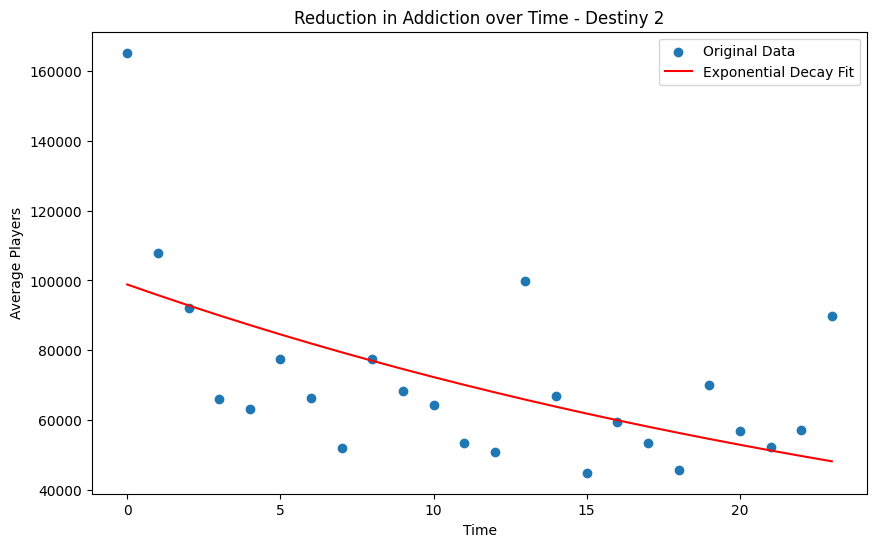

Game: Destiny 2
Decay Rate: 0.03127958198369614
-----------------------------


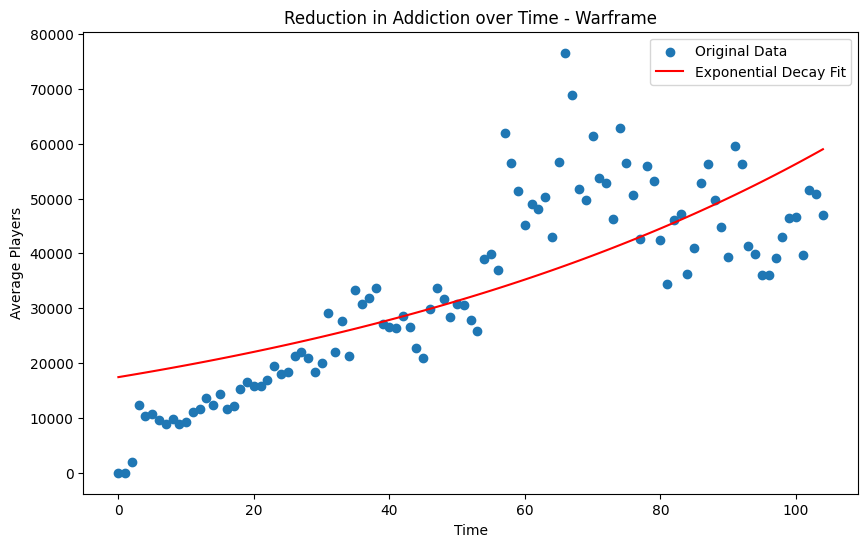

Game: Warframe
Decay Rate: -0.011722318700254867
-----------------------------
Error fitting exponential decay for Cookie Clicker
-----------------------------


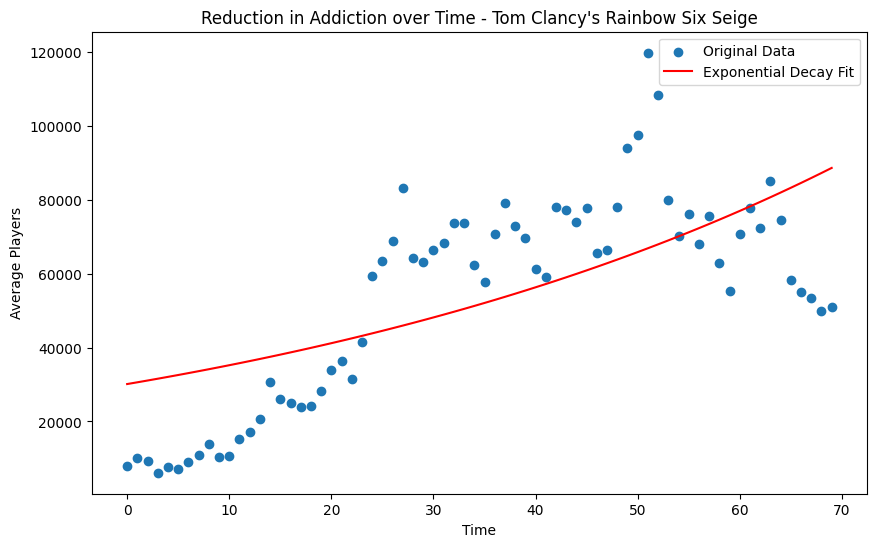

Game: Tom Clancy's Rainbow Six Seige
Decay Rate: -0.015639795816122085
-----------------------------


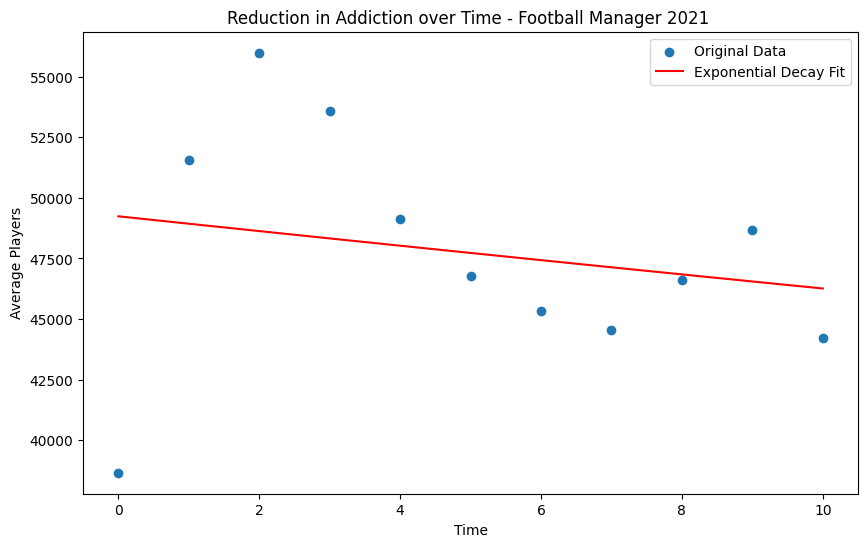

Game: Football Manager 2021 
Decay Rate: 0.006238847576942771
-----------------------------


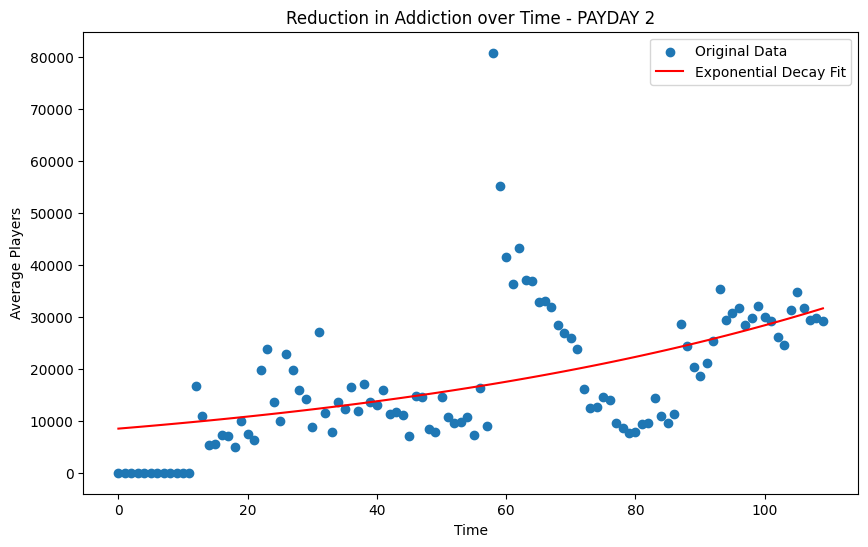

Game: PAYDAY 2
Decay Rate: -0.012068691320552688
-----------------------------


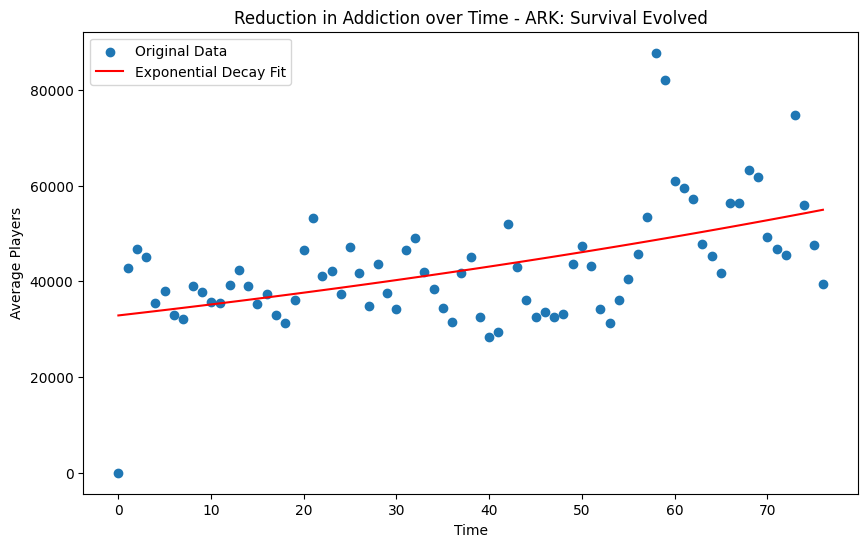

Game: ARK: Survival Evolved
Decay Rate: -0.006760141591241067
-----------------------------


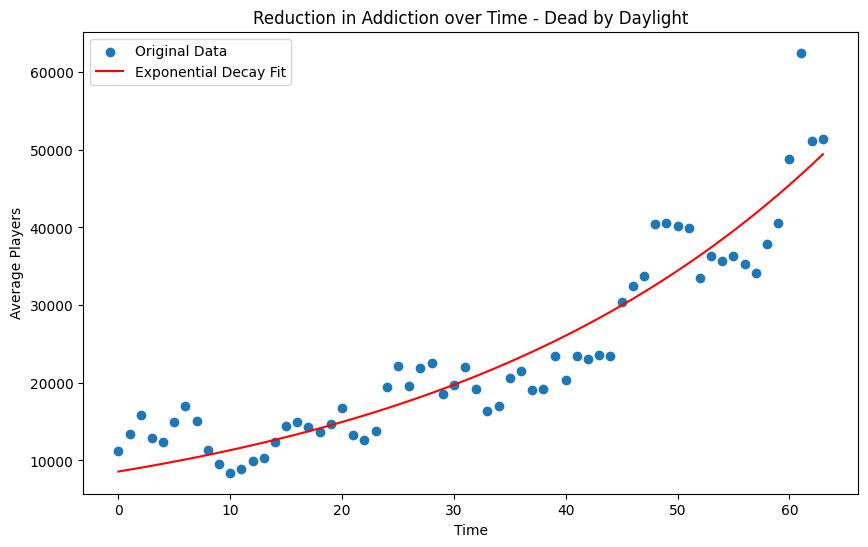

Game: Dead by Daylight
Decay Rate: -0.027811503255420804
-----------------------------


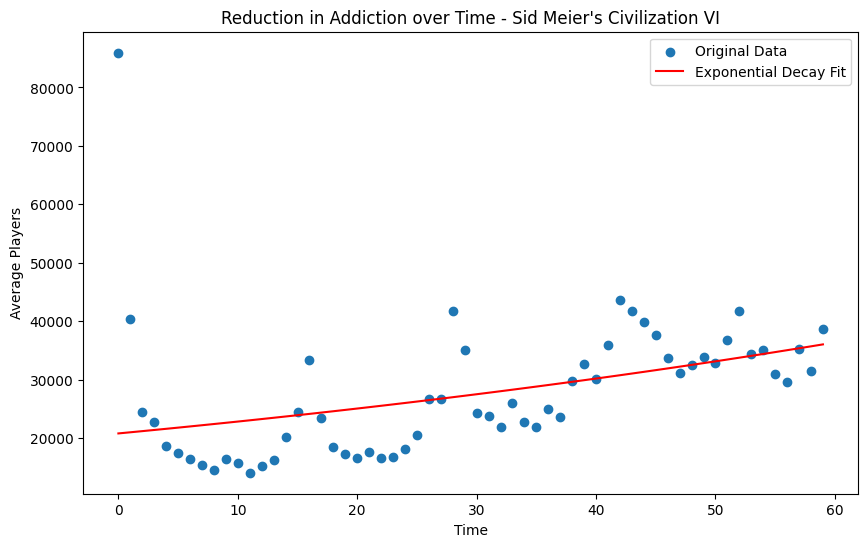

Game: Sid Meier's Civilization VI
Decay Rate: -0.00932020262367955
-----------------------------


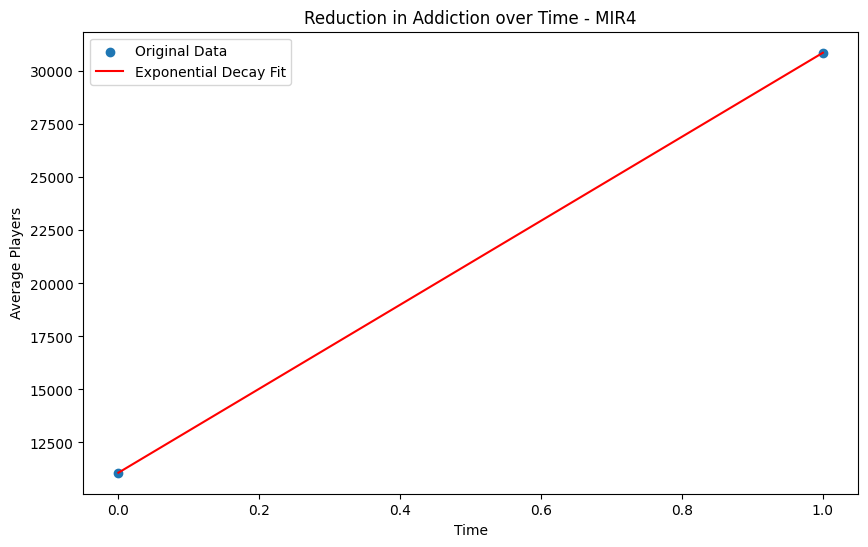

Game: MIR4
Decay Rate: -1.0253461355309026
-----------------------------


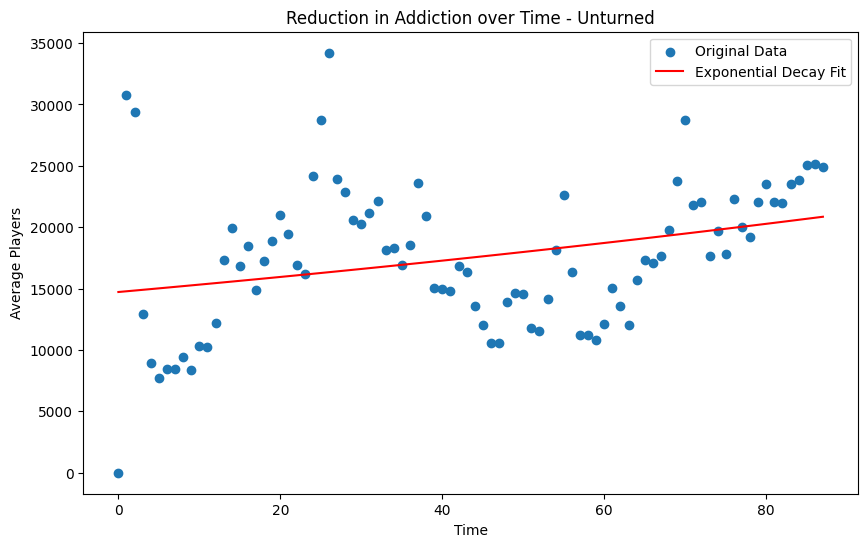

Game: Unturned
Decay Rate: -0.004000526906804711
-----------------------------


<ipython-input-4-a47024c3d0e6>:17: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


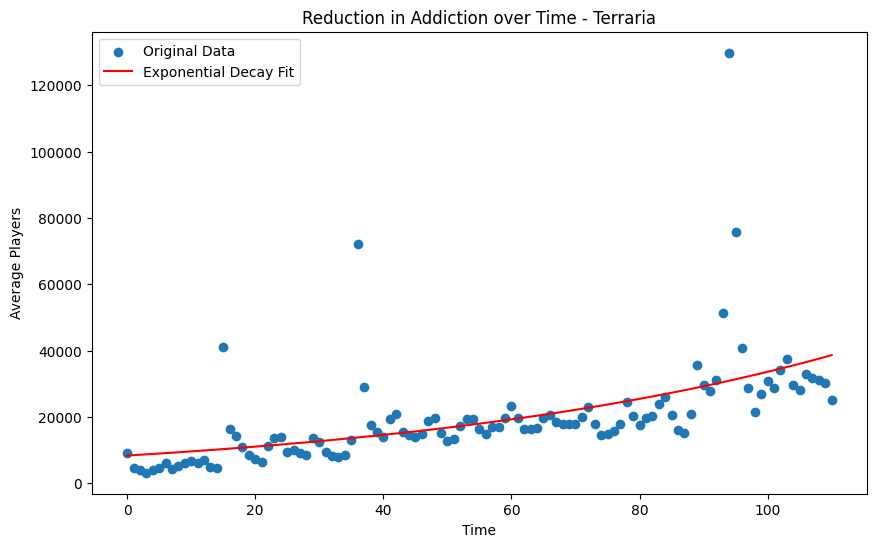

Game: Terraria
Decay Rate: -0.013899980465586876
-----------------------------


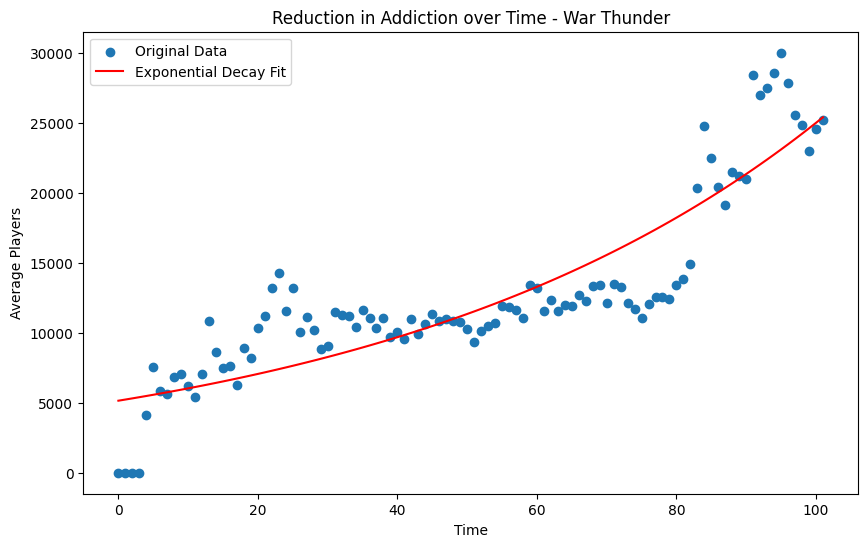

Game: War Thunder
Decay Rate: -0.015804425804207087
-----------------------------


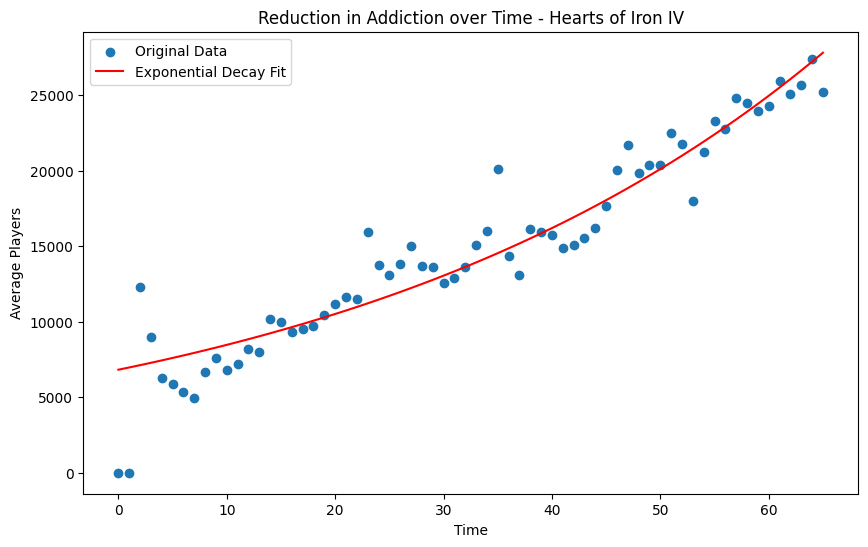

Game: Hearts of Iron IV
Decay Rate: -0.021618755089688624
-----------------------------


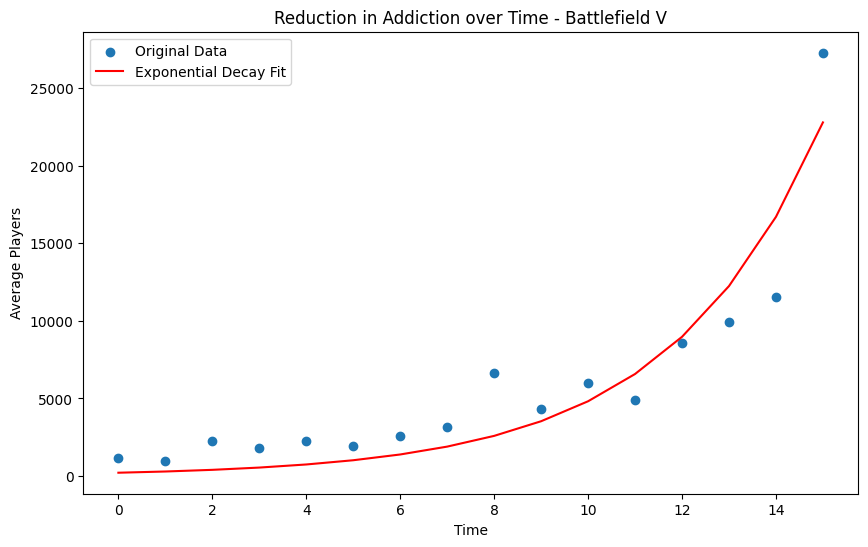

Game: Battlefield V
Decay Rate: -0.3106905001727174
-----------------------------


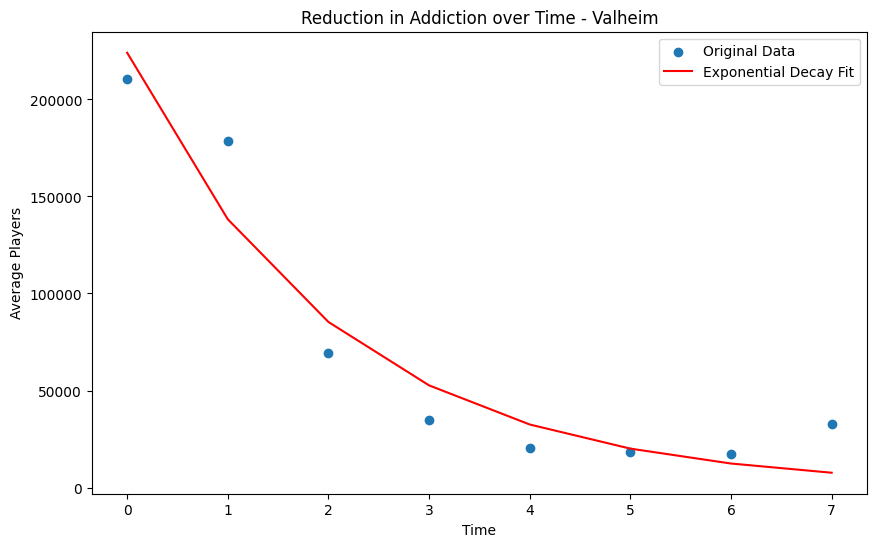

Game: Valheim
Decay Rate: 0.48280203892512896
-----------------------------


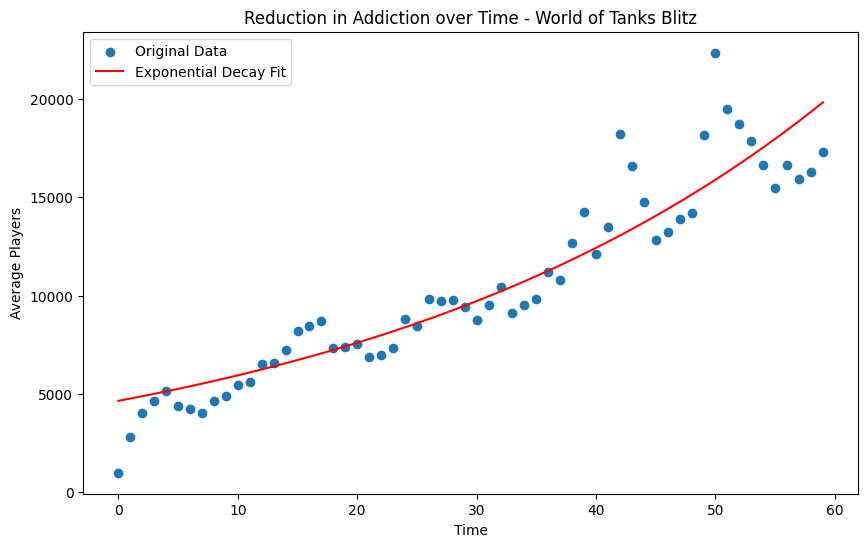

Game: World of Tanks Blitz
Decay Rate: -0.024571876593127956
-----------------------------


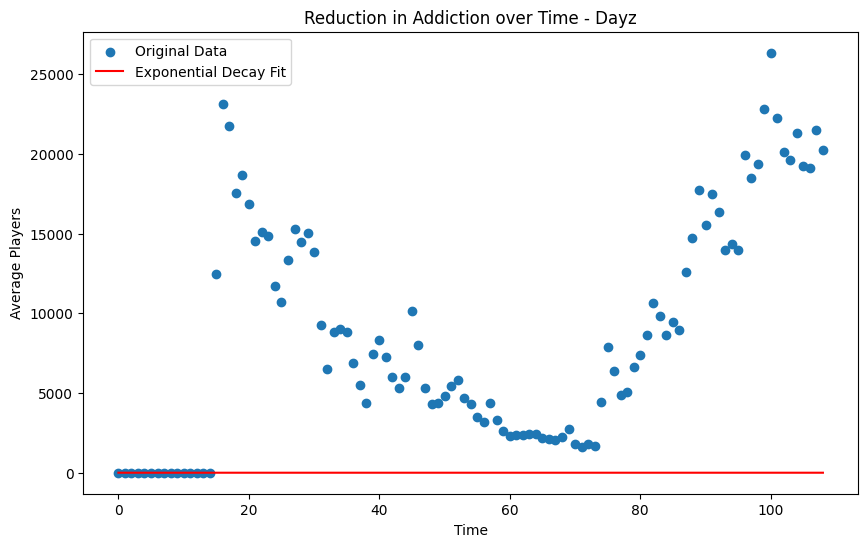

Game: Dayz
Decay Rate: 0.9157769805457863
-----------------------------


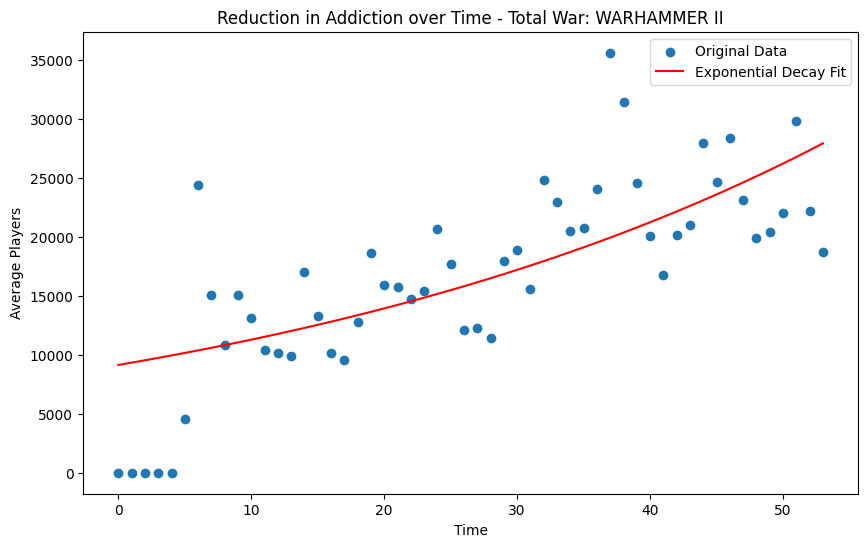

Game: Total War: WARHAMMER II
Decay Rate: -0.021065668705089455
-----------------------------


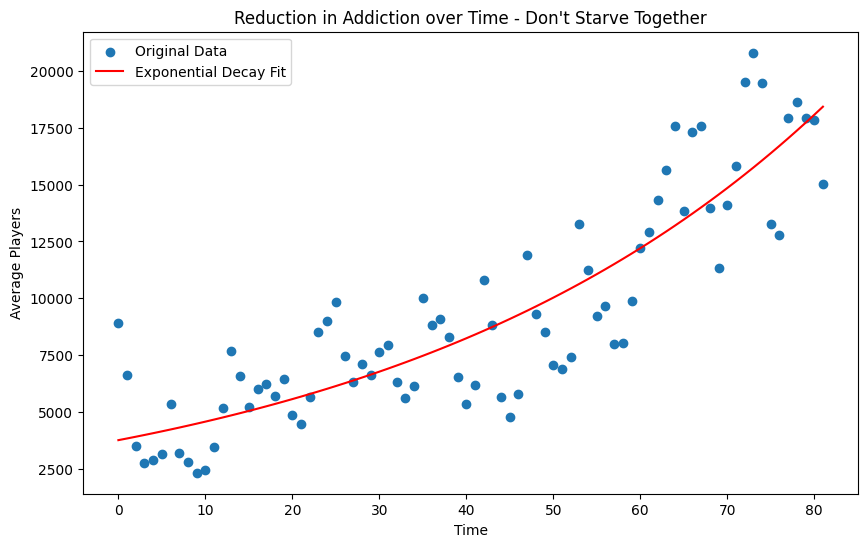

Game: Don't Starve Together
Decay Rate: -0.01963848207575808
-----------------------------


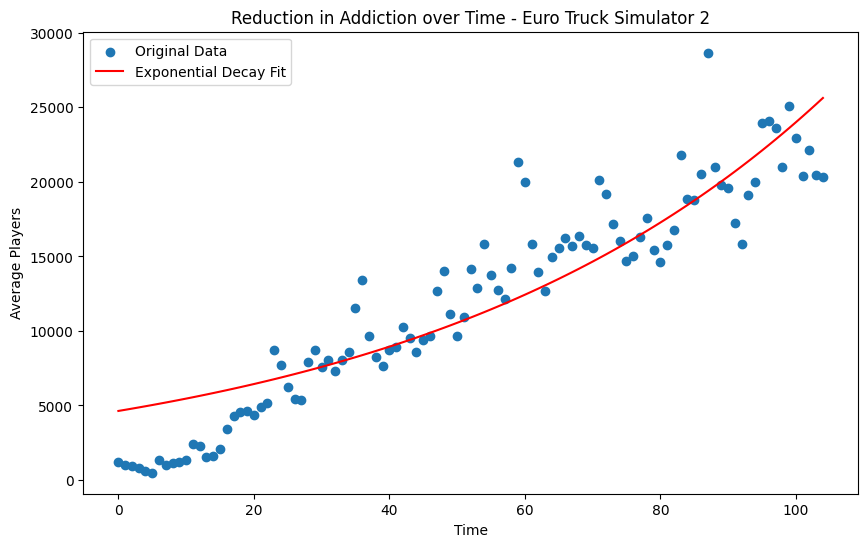

Game: Euro Truck Simulator 2
Decay Rate: -0.01644868186060881
-----------------------------


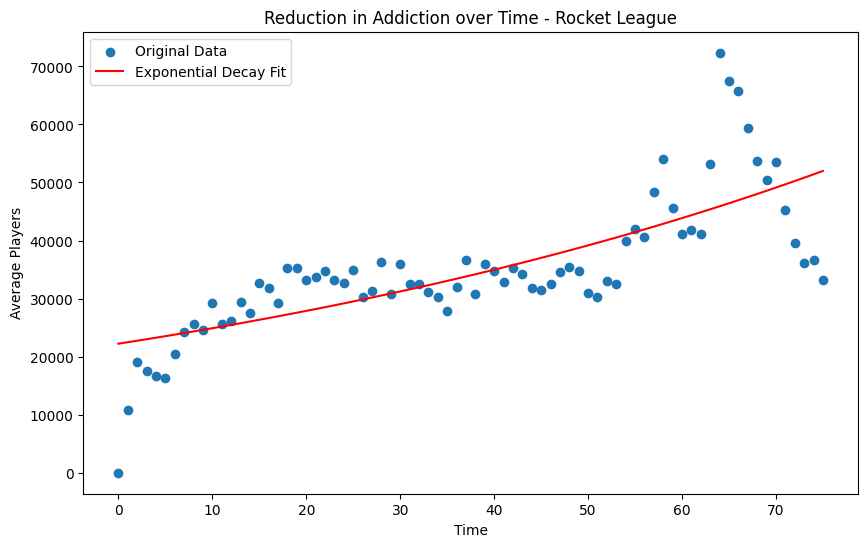

Game: Rocket League
Decay Rate: -0.011327394846483037
-----------------------------


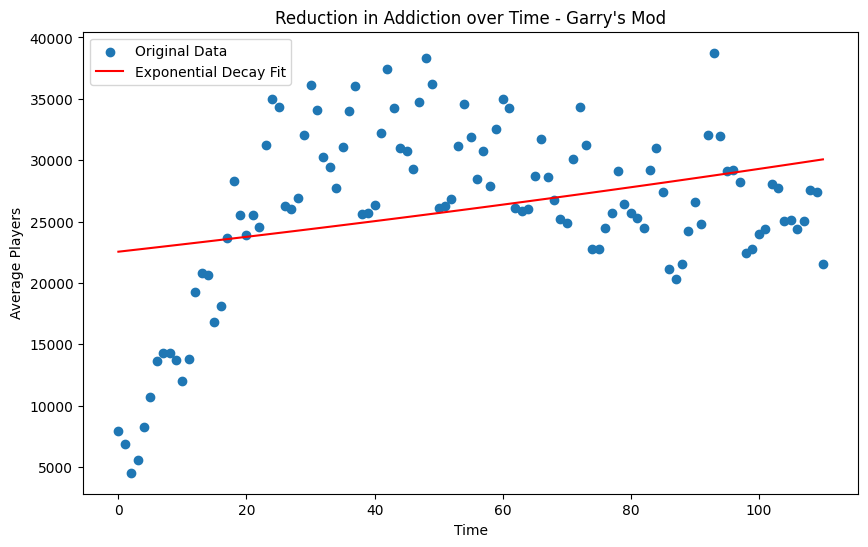

Game: Garry's Mod
Decay Rate: -0.0026183569908124547
-----------------------------


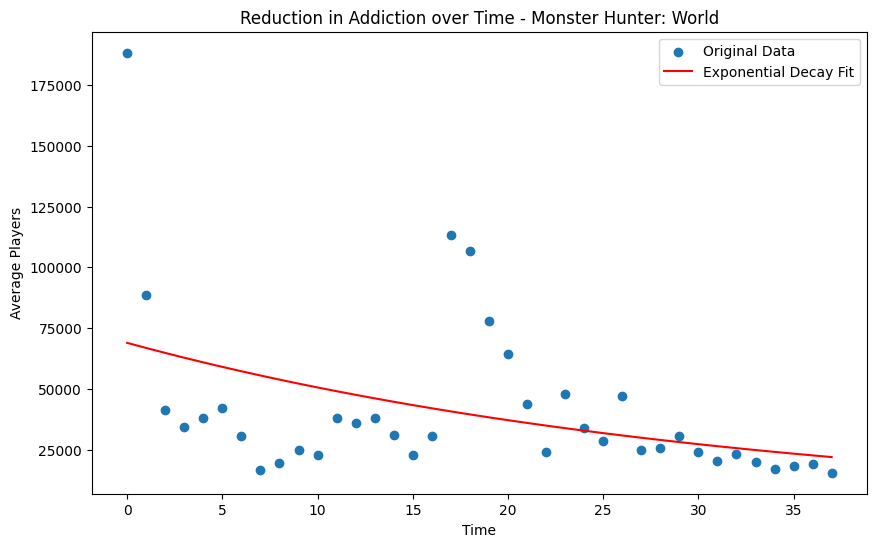

Game: Monster Hunter: World
Decay Rate: 0.030950771615510957
-----------------------------


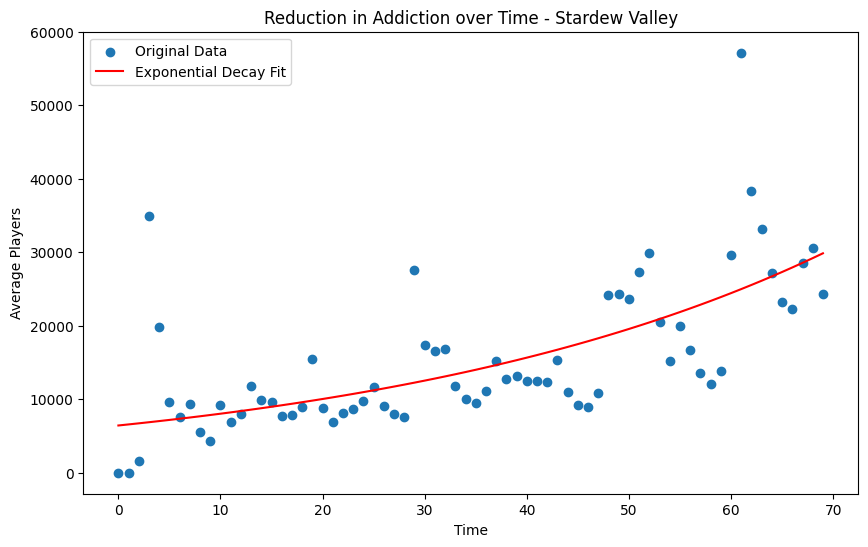

Game: Stardew Valley
Decay Rate: -0.02225531934669742
-----------------------------


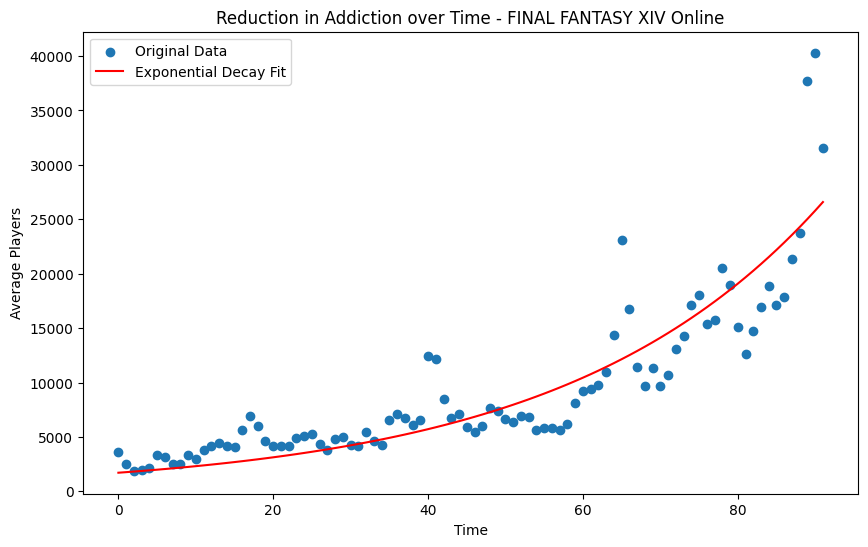

Game: FINAL FANTASY XIV Online
Decay Rate: -0.0301380930373232
-----------------------------


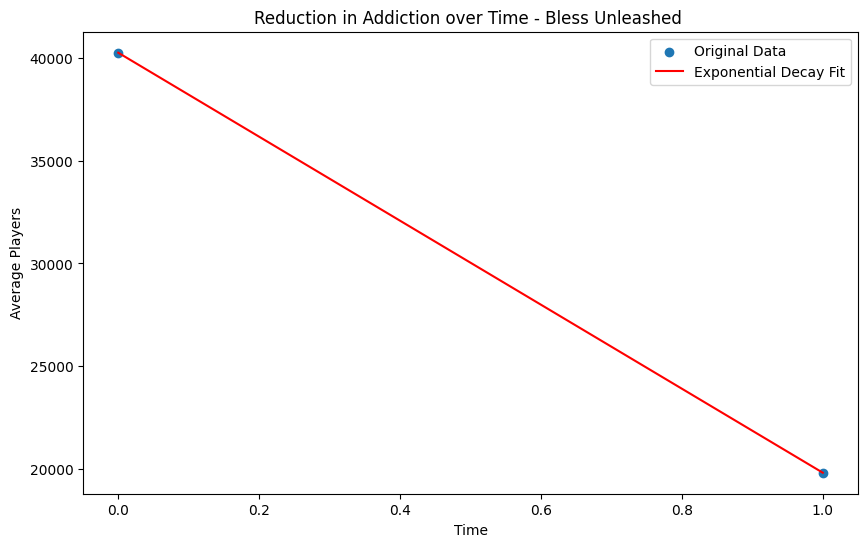

Game: Bless Unleashed 
Decay Rate: 0.7093772935979193
-----------------------------


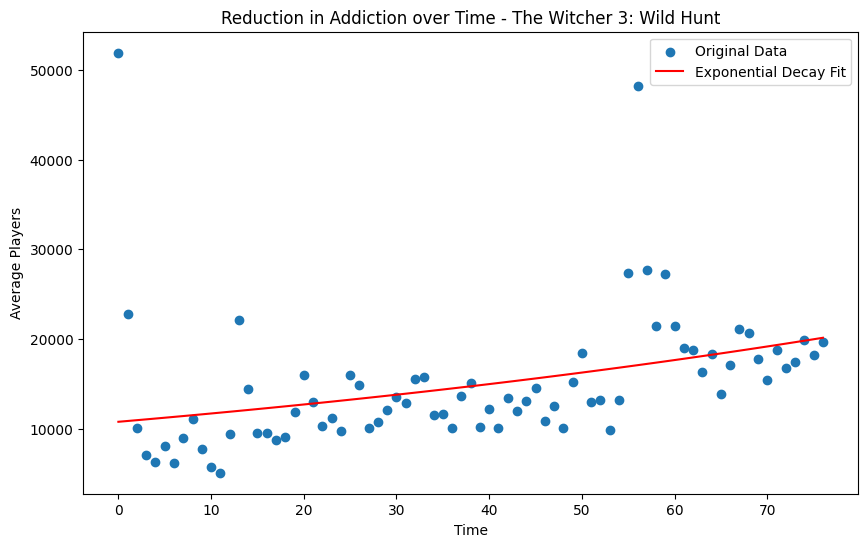

Game: The Witcher 3: Wild Hunt
Decay Rate: -0.008224776100482122
-----------------------------


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38592 (\N{CJK UNIFIED IDEOGRAPH-96C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39746 (\N{CJK UNIFIED IDEOGRAPH-9B42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40635 (\N{CJK UNIFIED IDEOGRAPH-9EBB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23558 (\N{CJK UNIFIED IDEOGRAPH-5C06}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


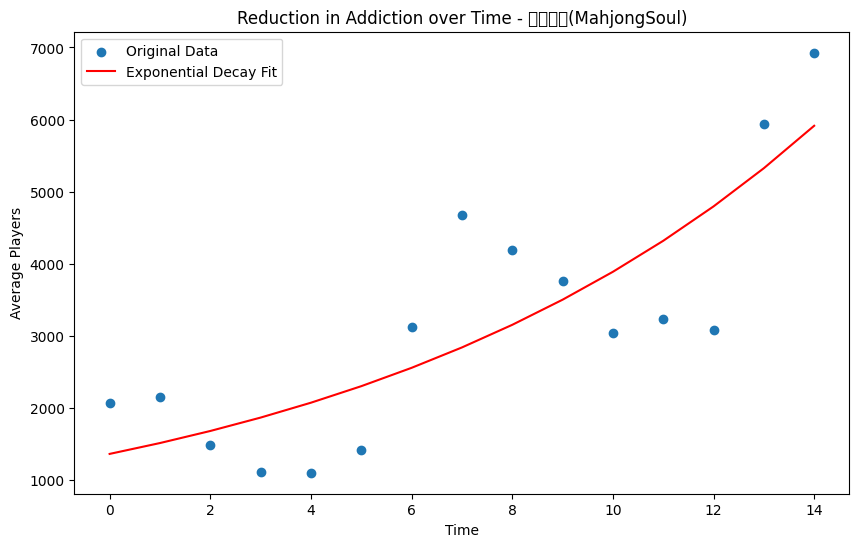

Game: 雀魂麻将(MahjongSoul)
Decay Rate: -0.10479720584313315
-----------------------------


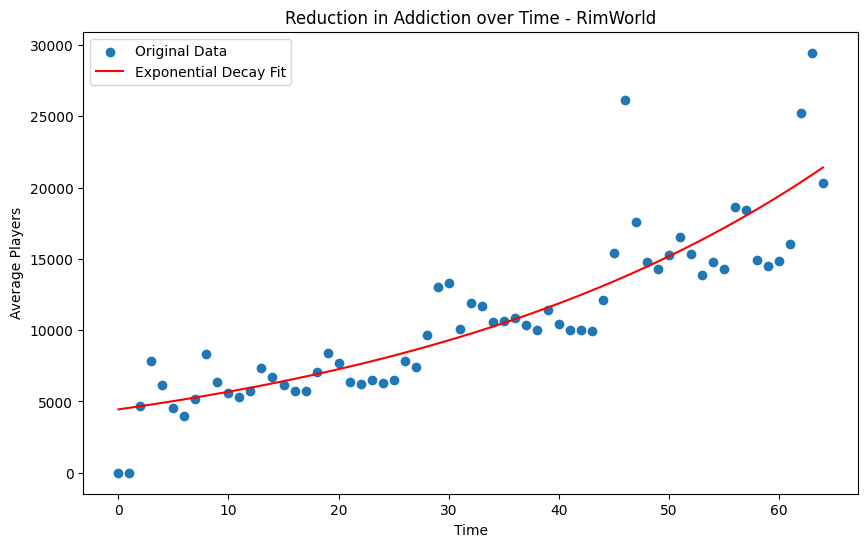

Game: RimWorld
Decay Rate: -0.02456281797490226
-----------------------------


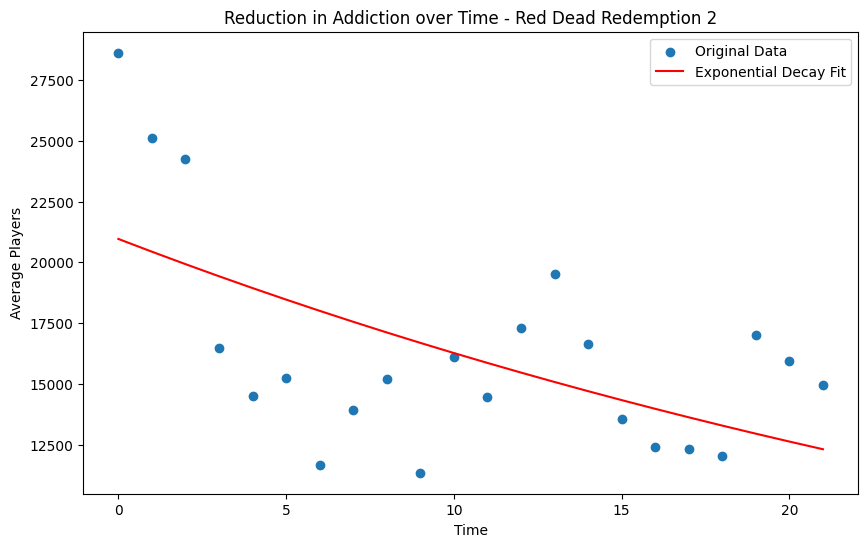

Game: Red Dead Redemption 2
Decay Rate: 0.02536065208573827
-----------------------------


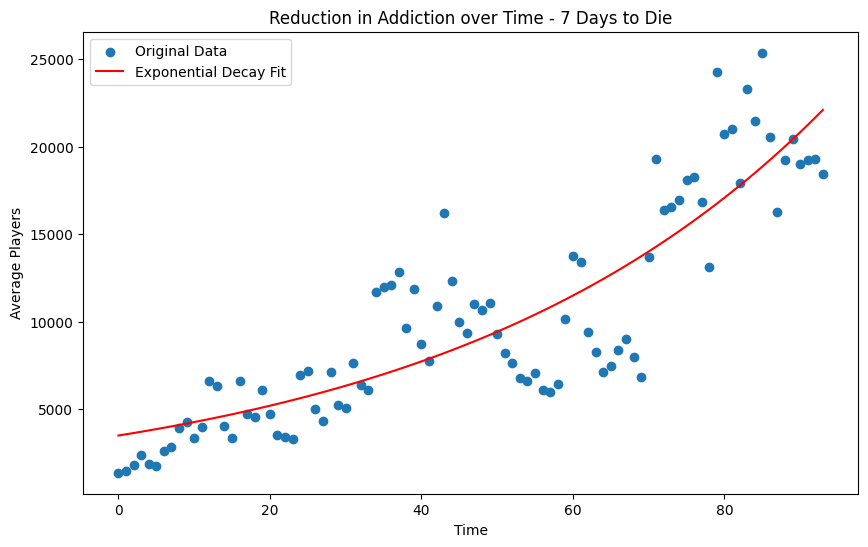

Game: 7 Days to Die
Decay Rate: -0.019808038474091797
-----------------------------


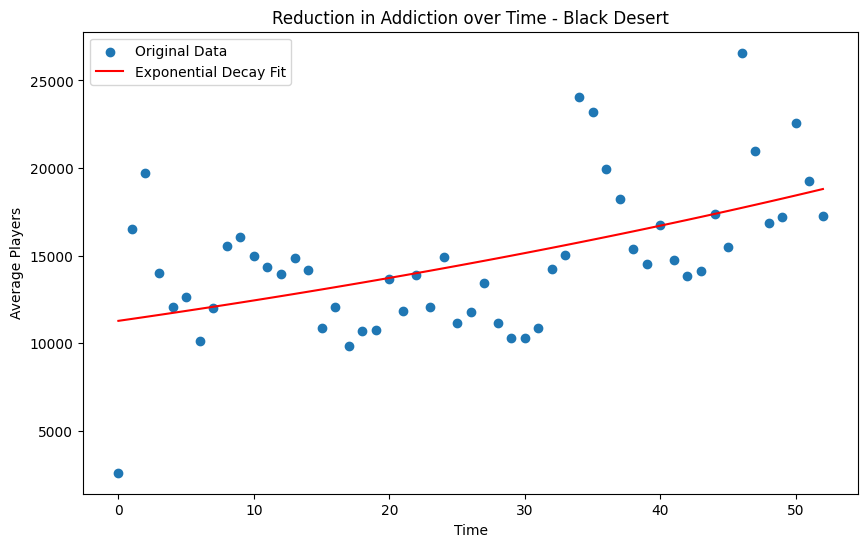

Game: Black Desert
Decay Rate: -0.009830712742604743
-----------------------------


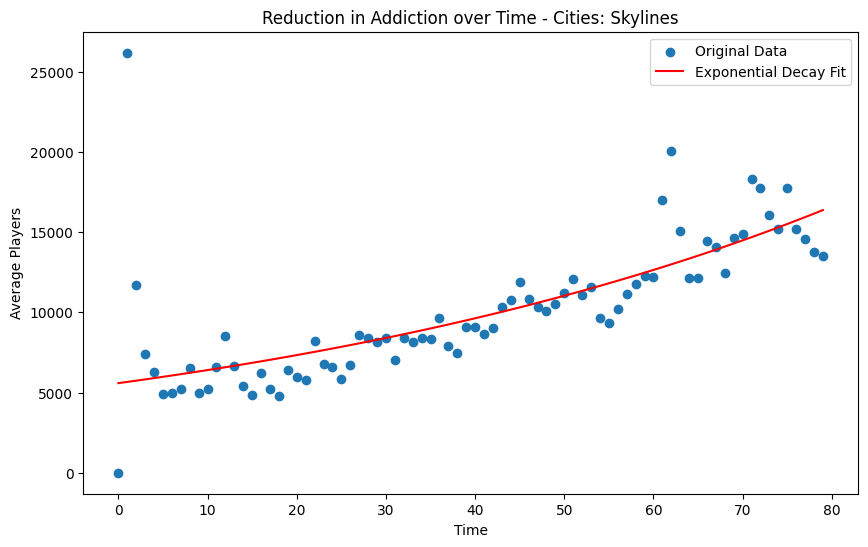

Game: Cities: Skylines
Decay Rate: -0.013614016428622205
-----------------------------


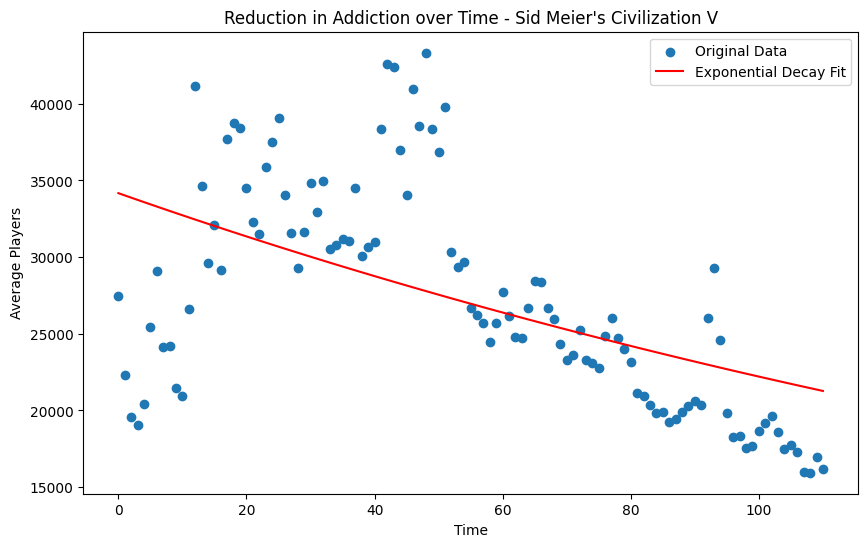

Game: Sid Meier's Civilization V
Decay Rate: 0.004309589761048178
-----------------------------


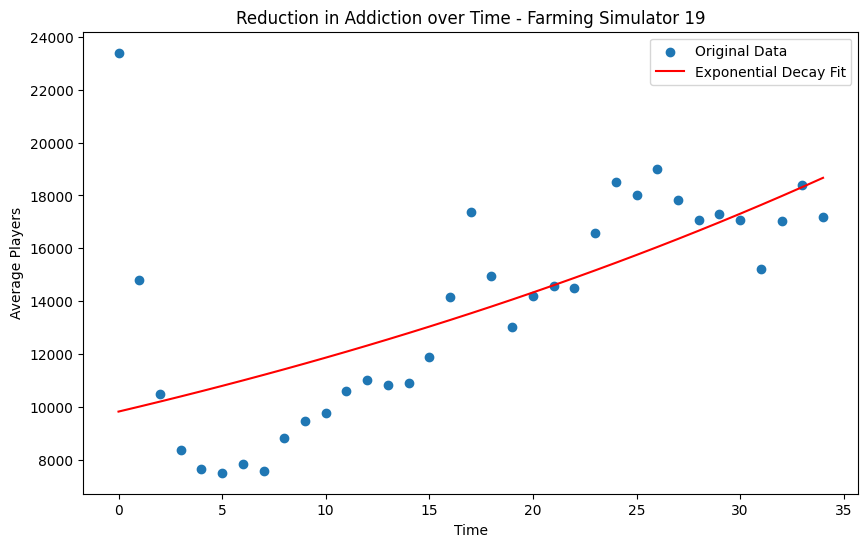

Game: Farming Simulator 19
Decay Rate: -0.01890937525843373
-----------------------------


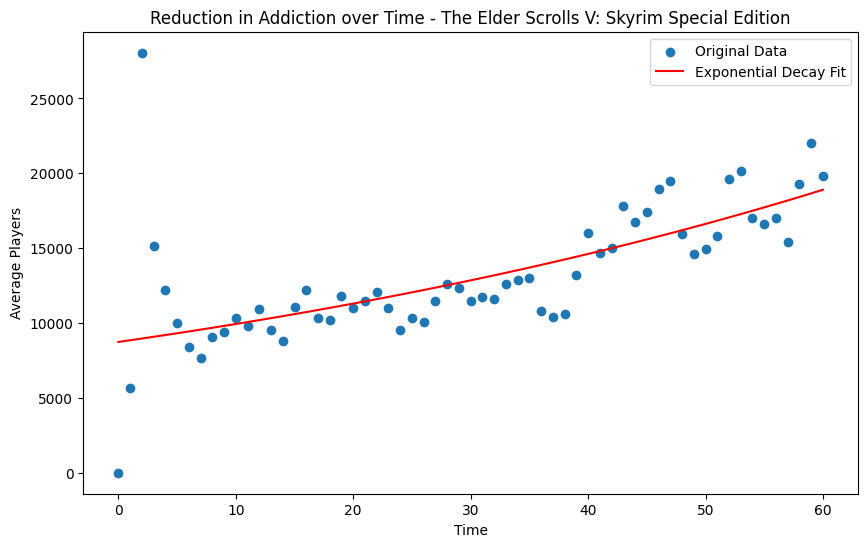

Game: The Elder Scrolls V: Skyrim Special Edition
Decay Rate: -0.012862617433657752
-----------------------------


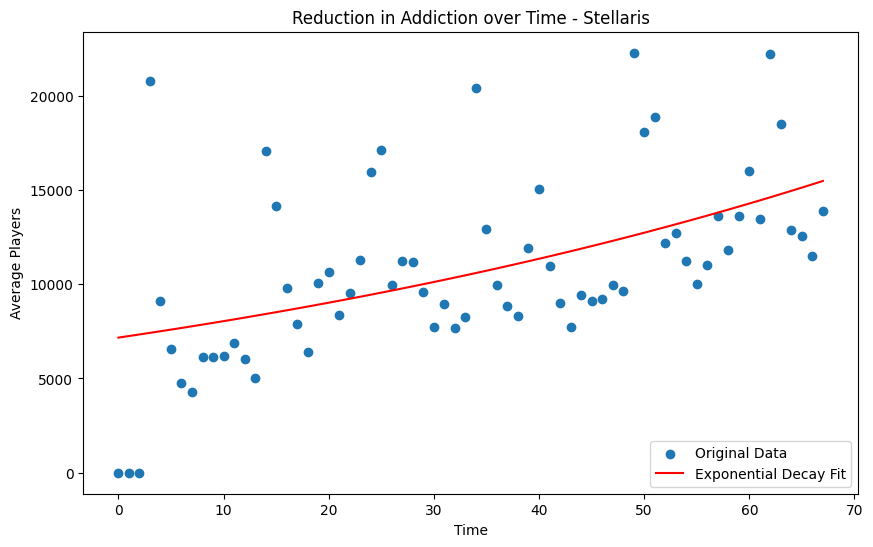

Game: Stellaris
Decay Rate: -0.01148857639528972
-----------------------------


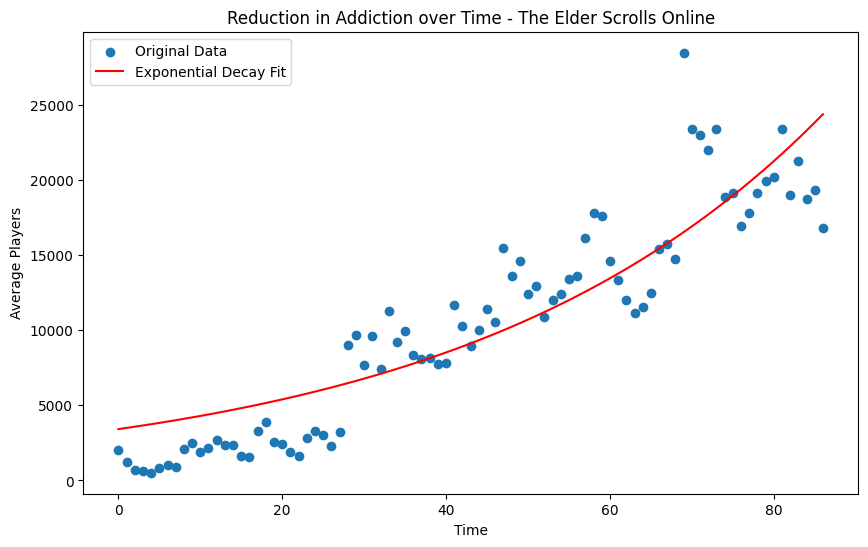

Game: The Elder Scrolls Online
Decay Rate: -0.0228577944698873
-----------------------------


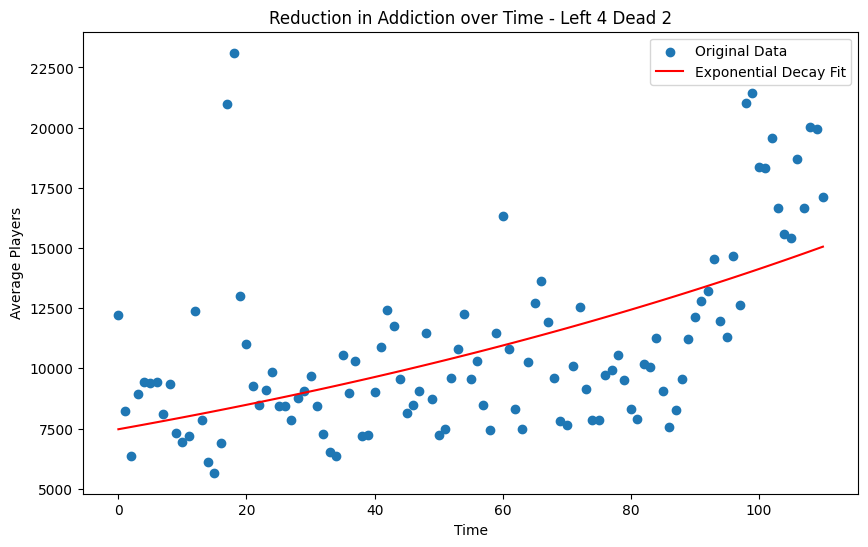

Game: Left 4 Dead 2
Decay Rate: -0.006369698504682703
-----------------------------


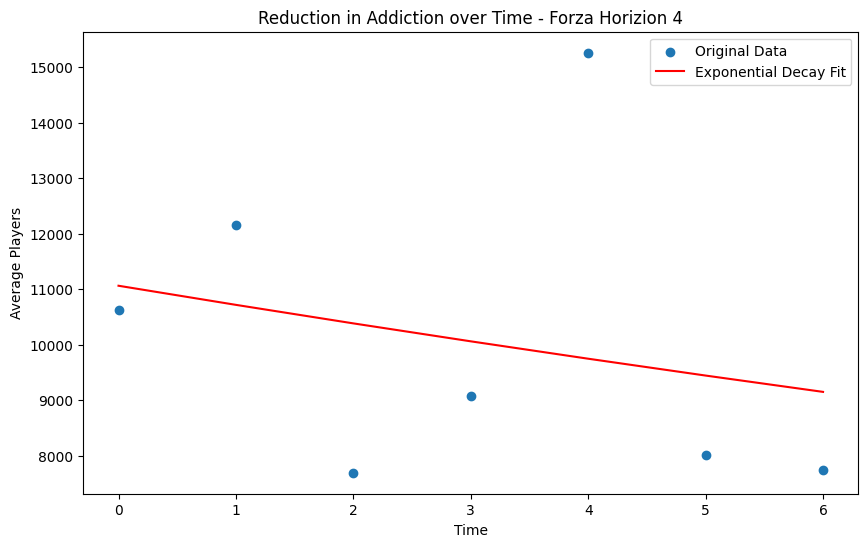

Game: Forza Horizion 4
Decay Rate: 0.03162935270502466
-----------------------------


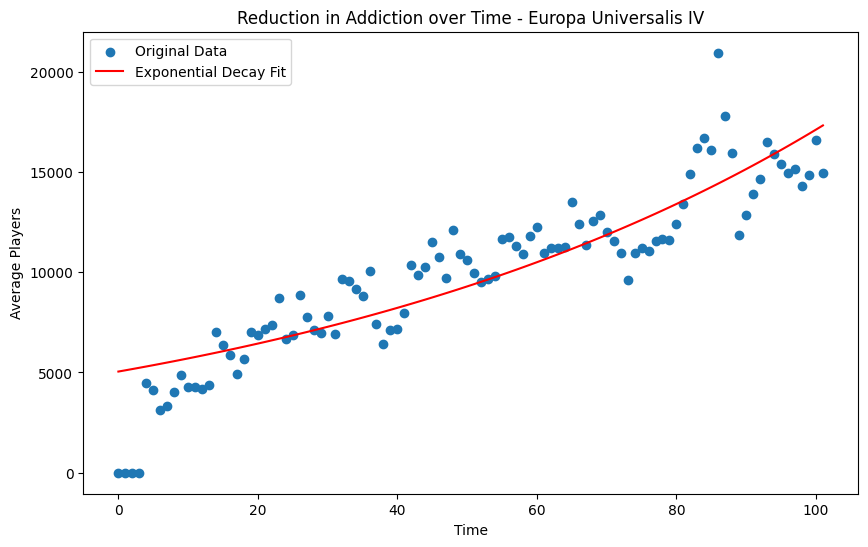

Game: Europa Universalis IV
Decay Rate: -0.01221200921570169
-----------------------------


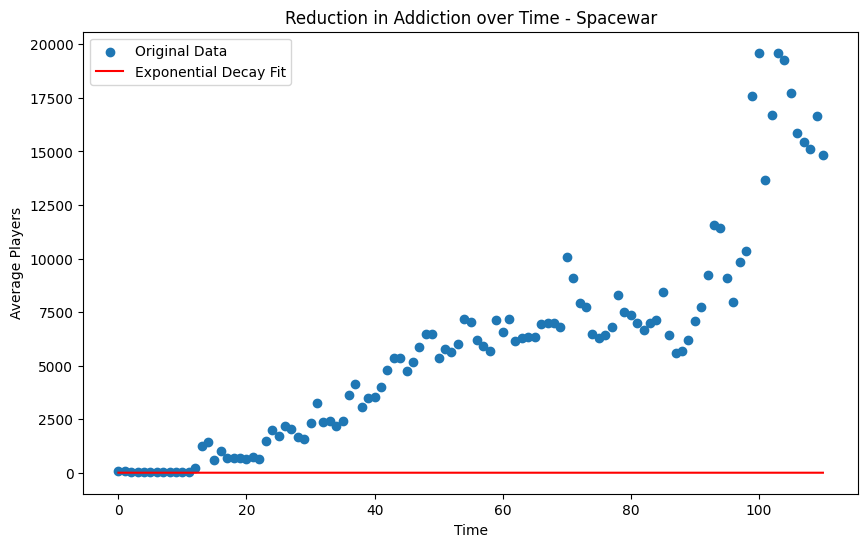

Game: Spacewar
Decay Rate: 0.8519925161838386
-----------------------------


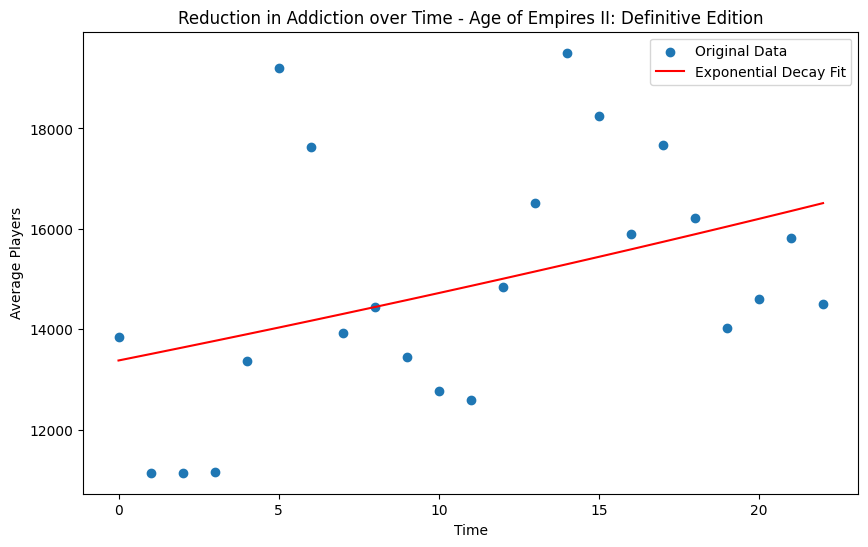

Game: Age of Empires II: Definitive Edition
Decay Rate: -0.009574807374943402
-----------------------------
Error fitting exponential decay for Pathfinder: Wrath of Righteous
-----------------------------


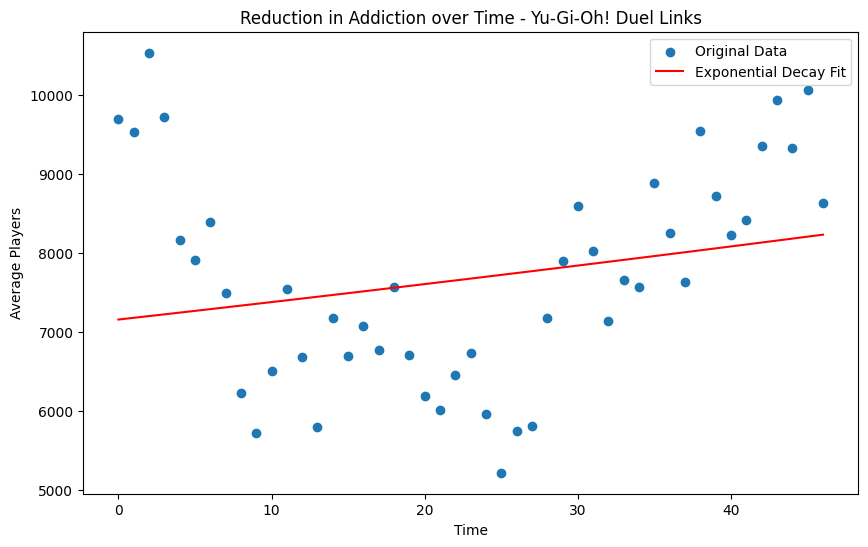

Game: Yu-Gi-Oh! Duel Links
Decay Rate: -0.0030431339739441085
-----------------------------


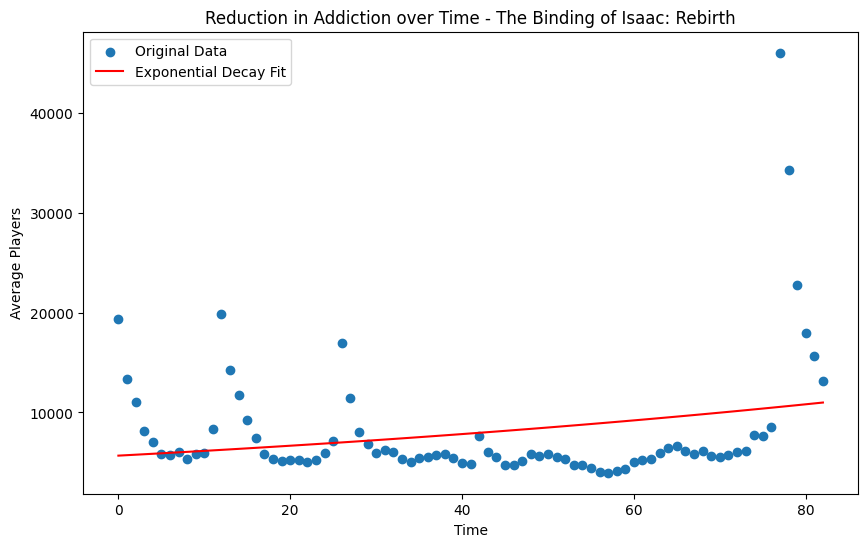

Game: The Binding of Isaac: Rebirth
Decay Rate: -0.008072856409091946
-----------------------------


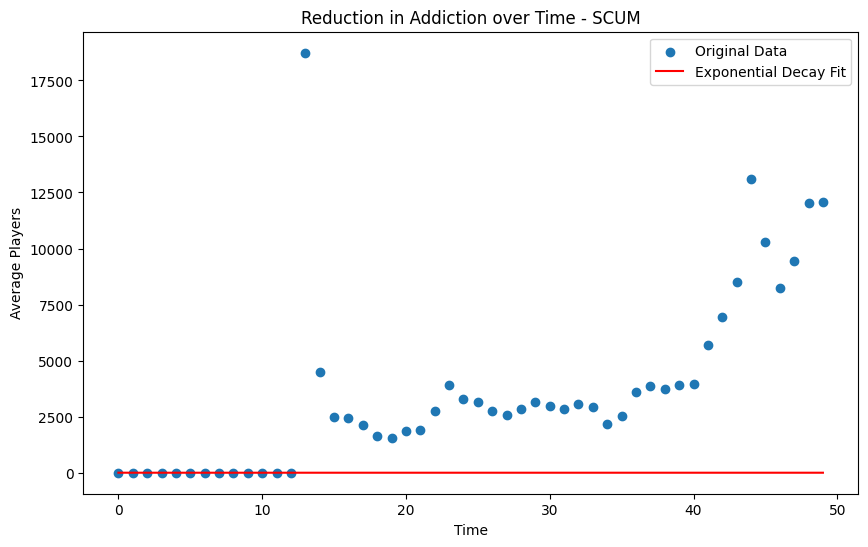

Game: SCUM
Decay Rate: 0.7638129278256108
-----------------------------


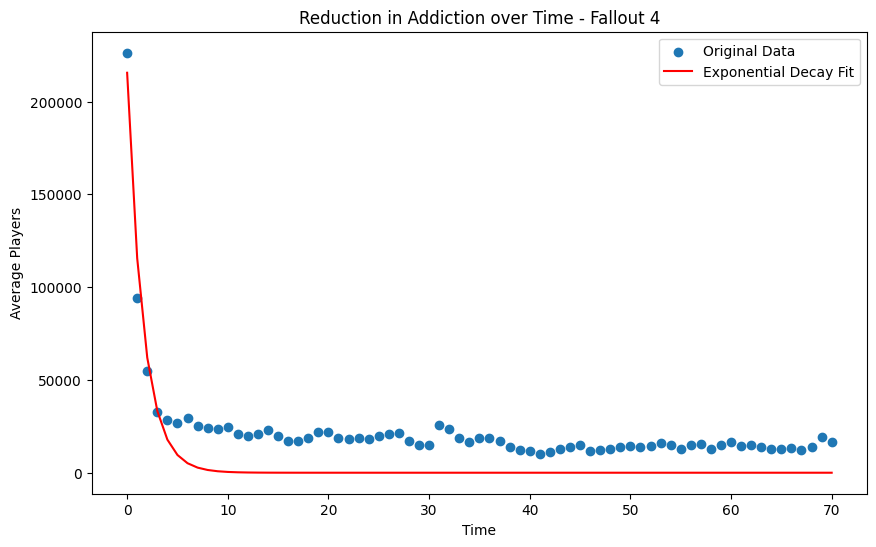

Game: Fallout 4
Decay Rate: 0.6230558001784499
-----------------------------


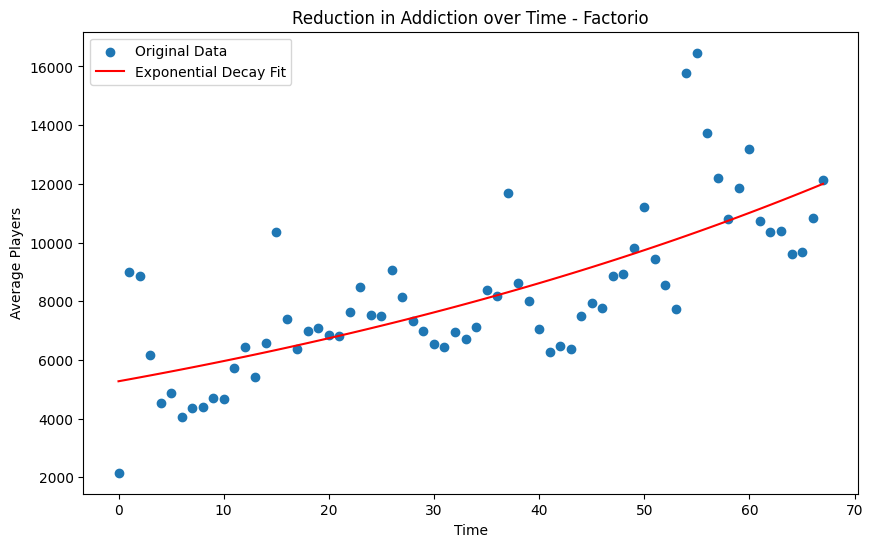

Game: Factorio
Decay Rate: -0.012270018221119918
-----------------------------


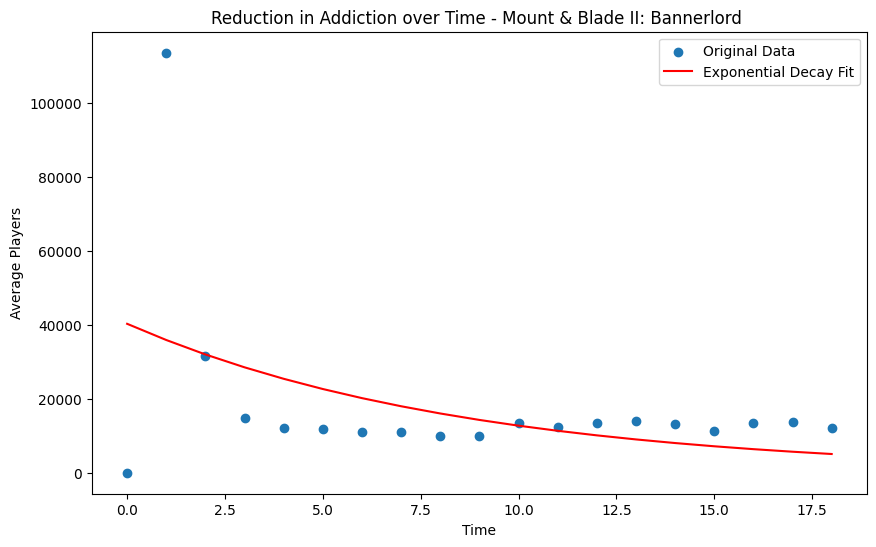

Game: Mount & Blade II: Bannerlord 
Decay Rate: 0.1152186697504839
-----------------------------


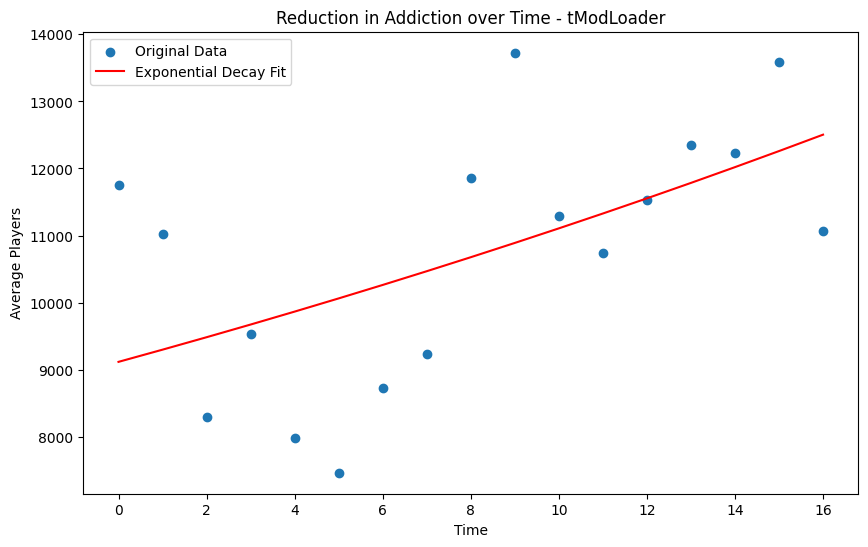

Game: tModLoader
Decay Rate: -0.01974161342330319
-----------------------------
Error fitting exponential decay for NBA 2k22
-----------------------------


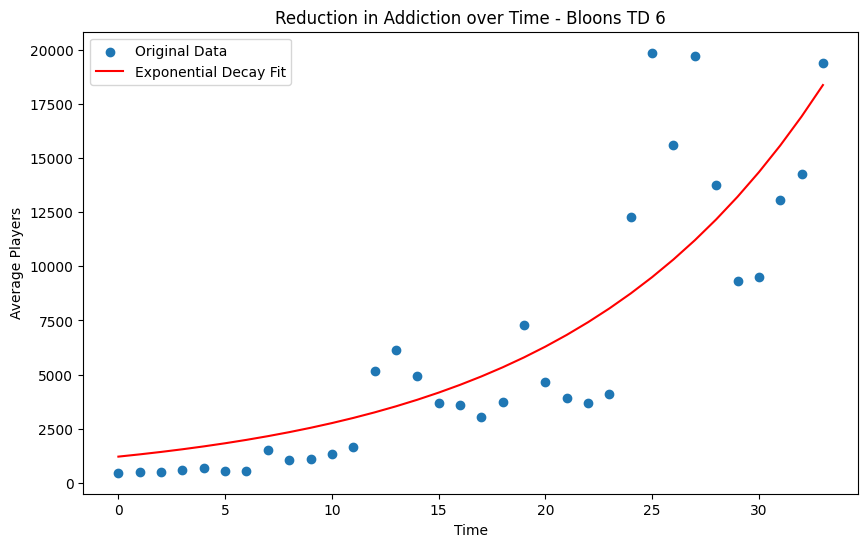

Game: Bloons TD 6
Decay Rate: -0.08244636177415914
-----------------------------


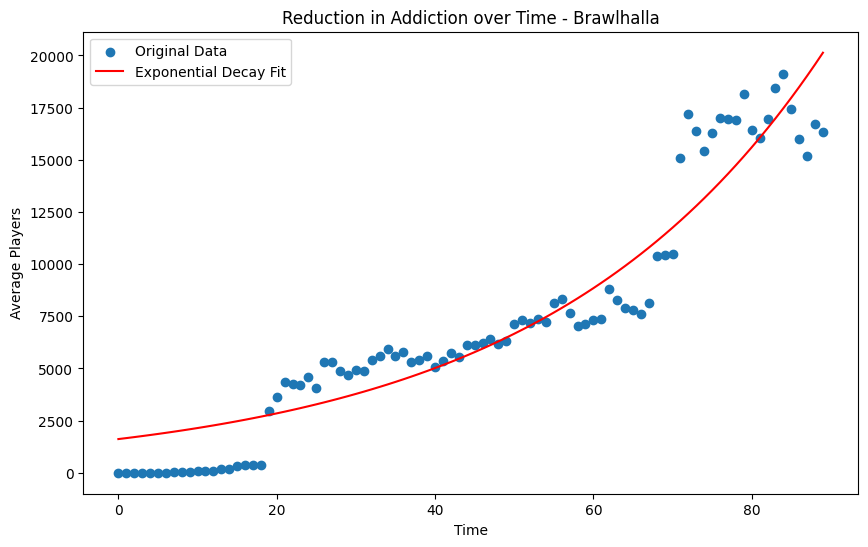

Game: Brawlhalla
Decay Rate: -0.028359878718537148
-----------------------------


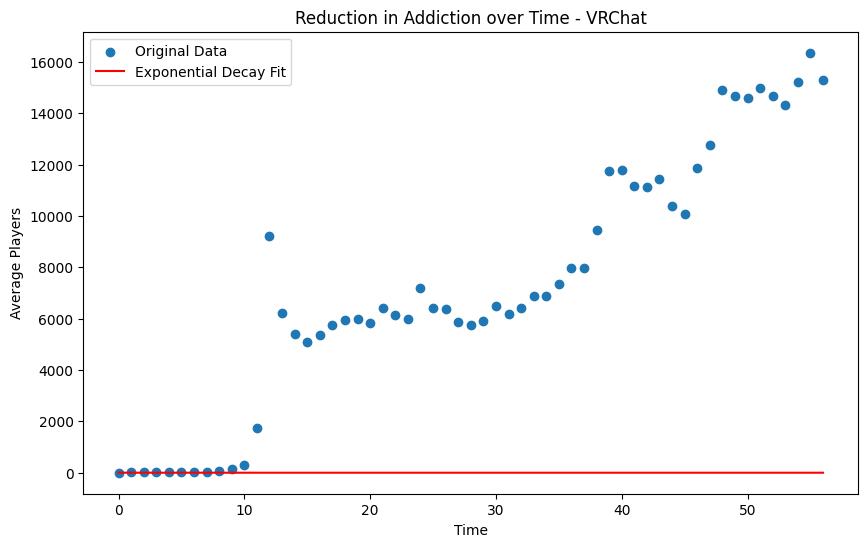

Game: VRChat
Decay Rate: 0.8769066899663139
-----------------------------


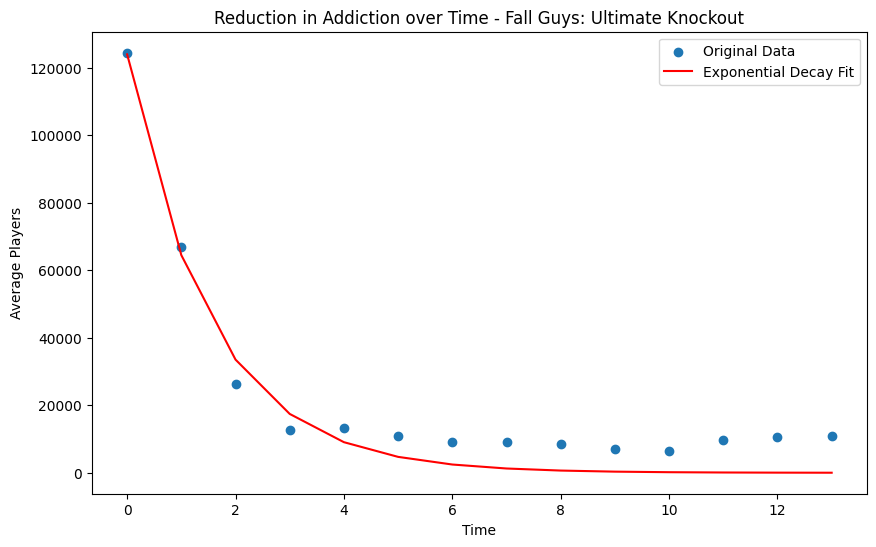

Game: Fall Guys: Ultimate Knockout
Decay Rate: 0.6537034008459173
-----------------------------


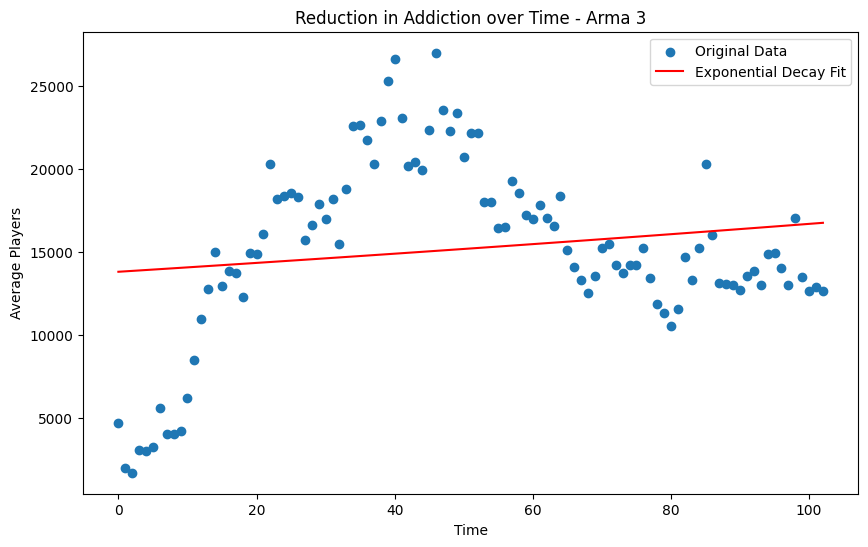

Game: Arma 3
Decay Rate: -0.0018931127718458814
-----------------------------


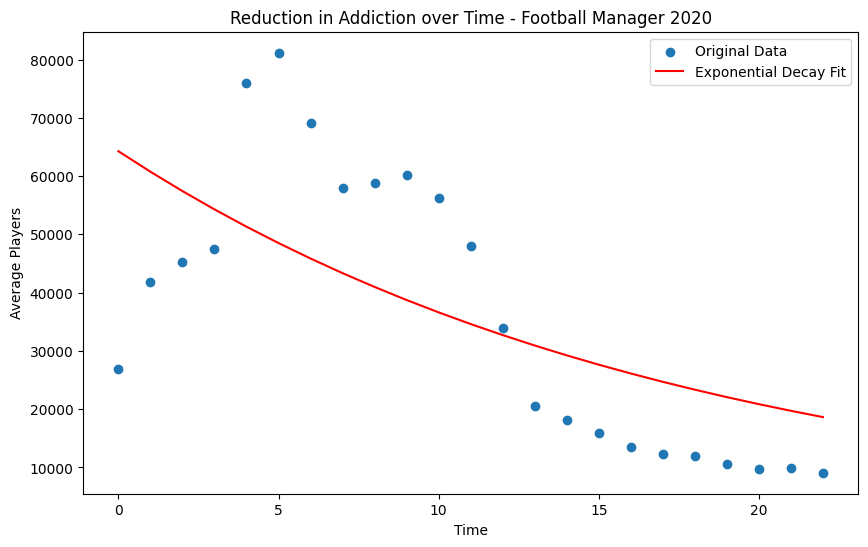

Game: Football Manager 2020
Decay Rate: 0.056264429564709645
-----------------------------


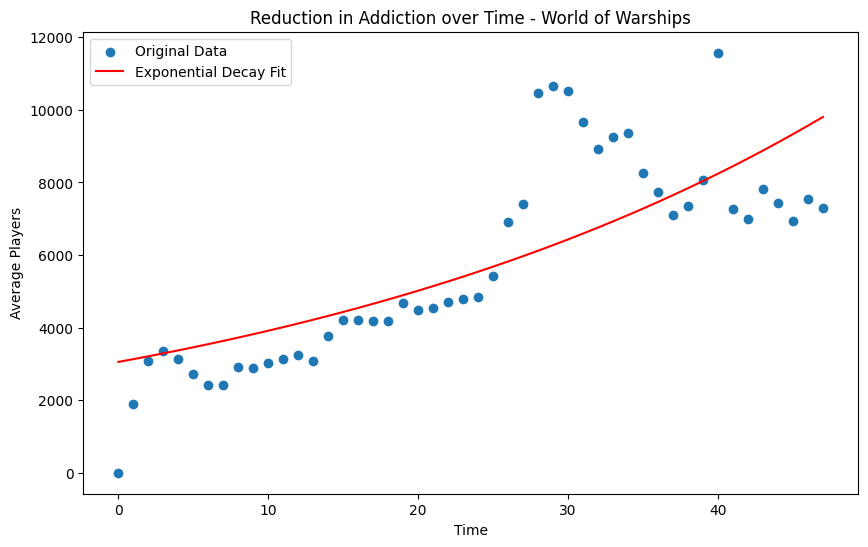

Game: World of Warships
Decay Rate: -0.024815137046418367
-----------------------------


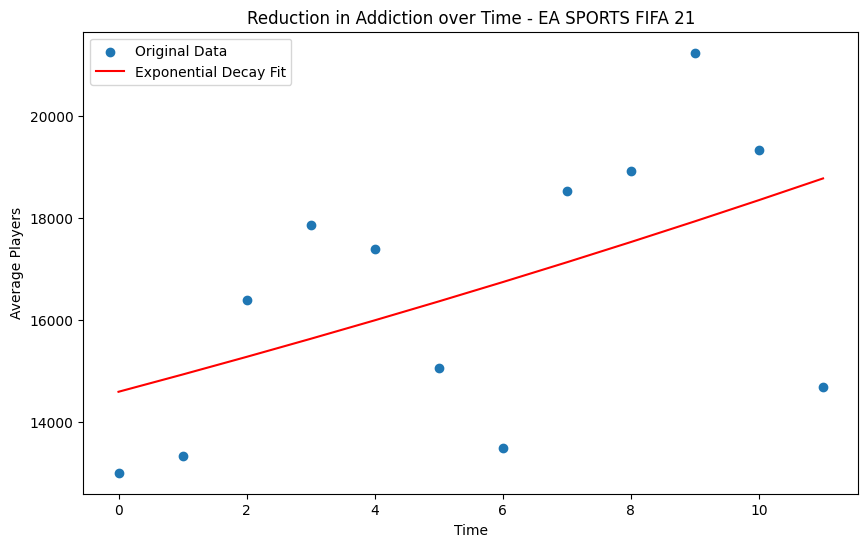

Game: EA SPORTS FIFA 21
Decay Rate: -0.022872940603803755
-----------------------------


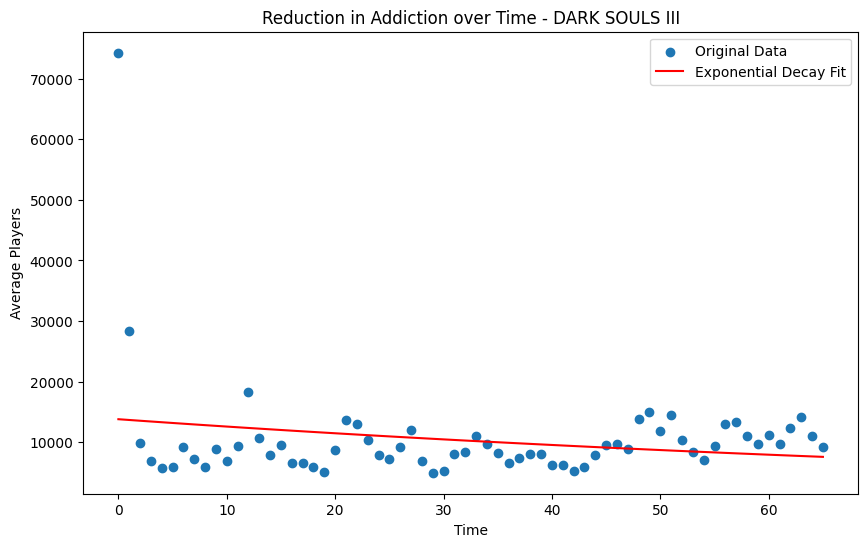

Game: DARK SOULS III
Decay Rate: 0.00919093720741079
-----------------------------


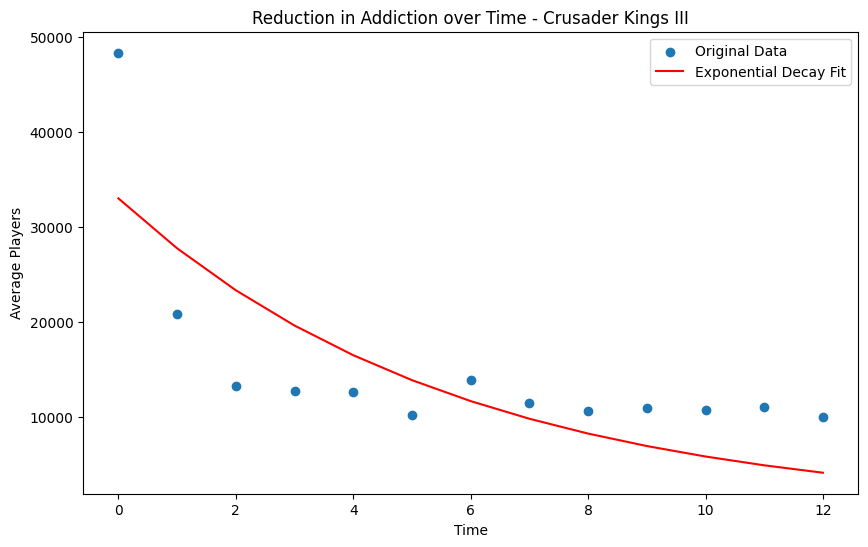

Game: Crusader Kings III
Decay Rate: 0.1734306139825831
-----------------------------


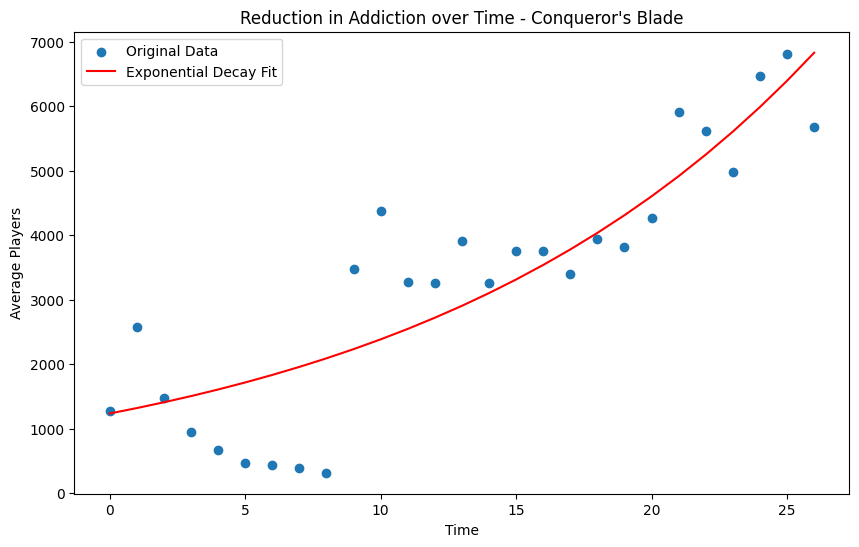

Game: Conqueror's Blade
Decay Rate: -0.06573858561884022
-----------------------------


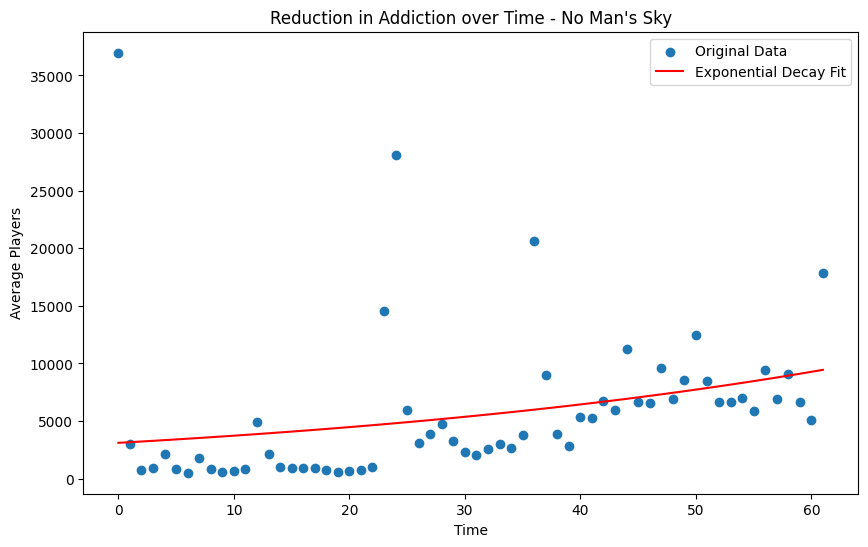

Game: No Man's Sky
Decay Rate: -0.01823735675624093
-----------------------------


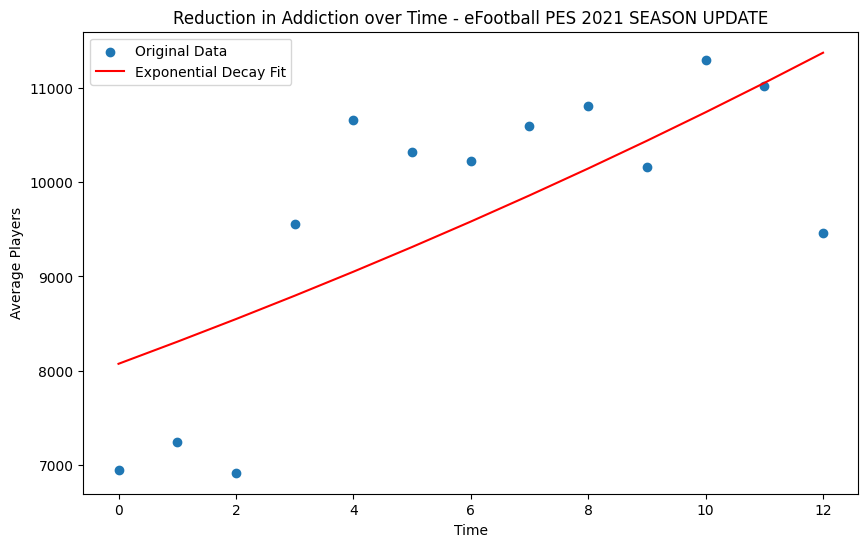

Game: eFootball PES 2021 SEASON UPDATE
Decay Rate: -0.02859941945450467
-----------------------------


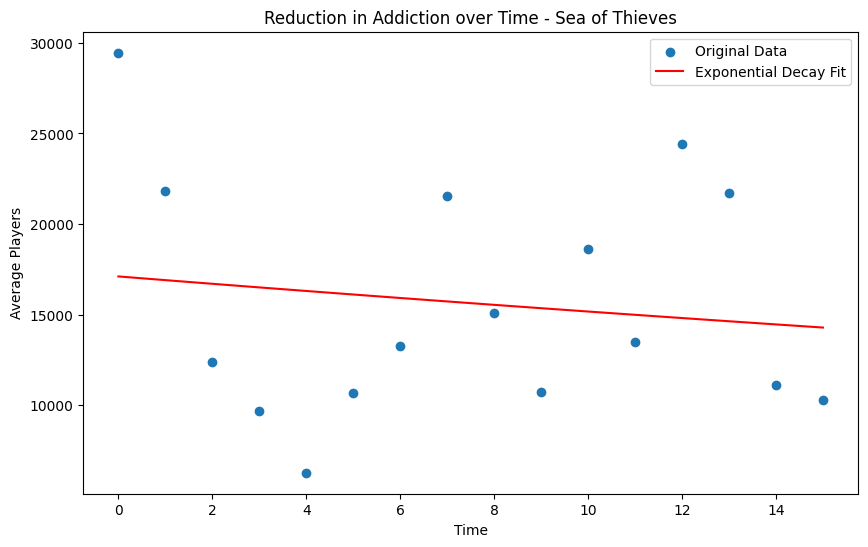

Game: Sea of Thieves
Decay Rate: 0.012021259980693
-----------------------------


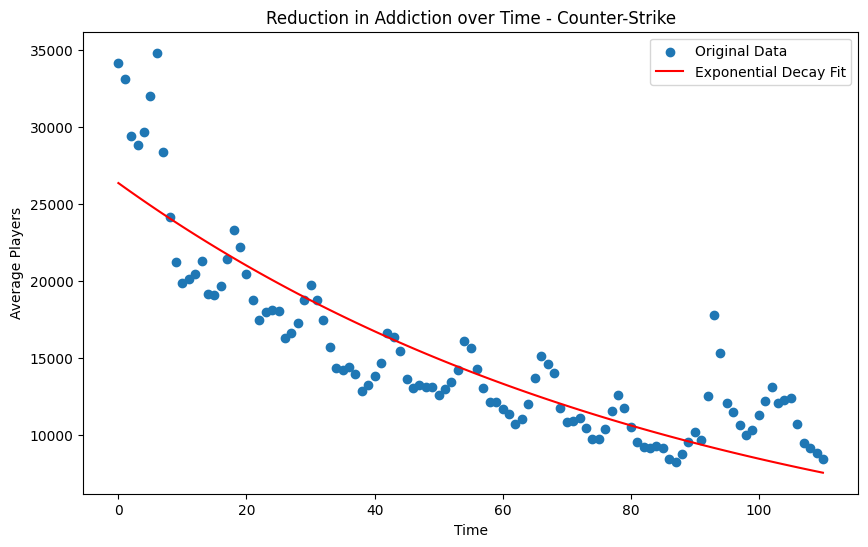

Game: Counter-Strike
Decay Rate: 0.011352060790585122
-----------------------------
Error fitting exponential decay for Tales of Arise
-----------------------------


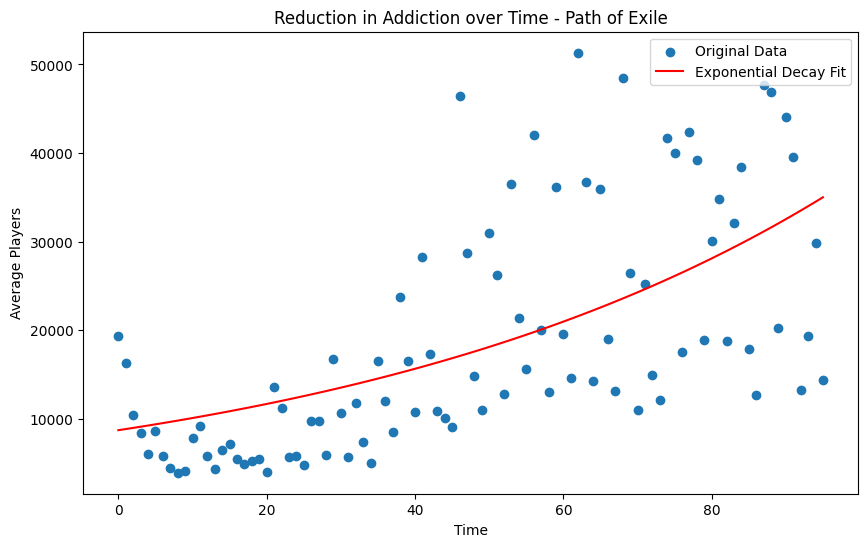

Game: Path of Exile
Decay Rate: -0.014648051966584587
-----------------------------


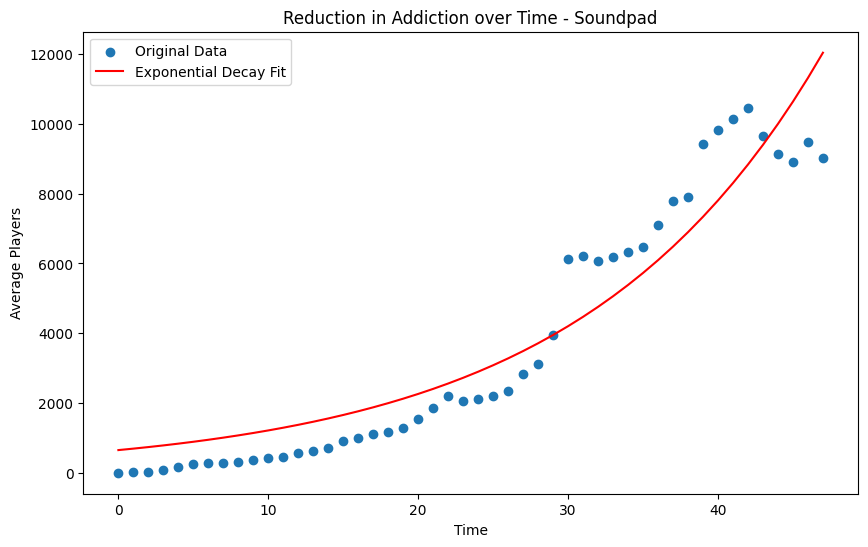

Game: Soundpad
Decay Rate: -0.061846849325604504
-----------------------------


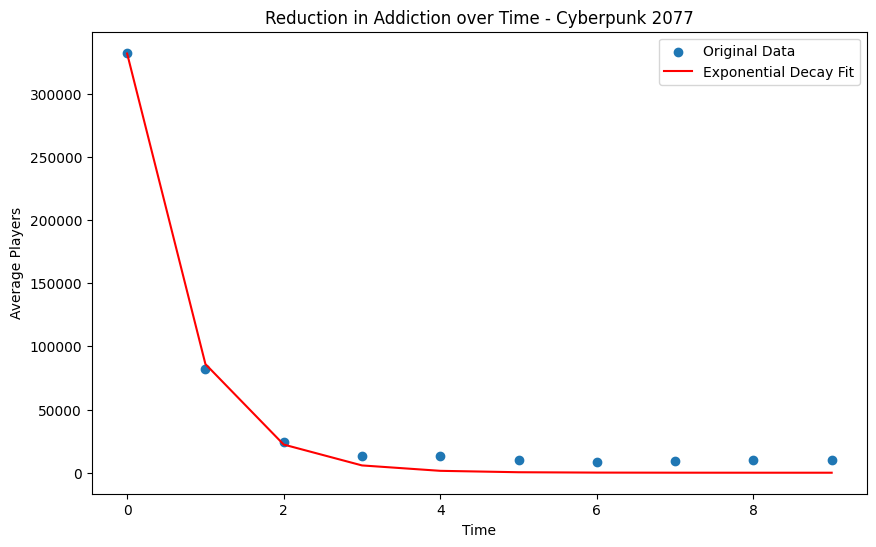

Game: Cyberpunk 2077
Decay Rate: 1.350056698254501
-----------------------------


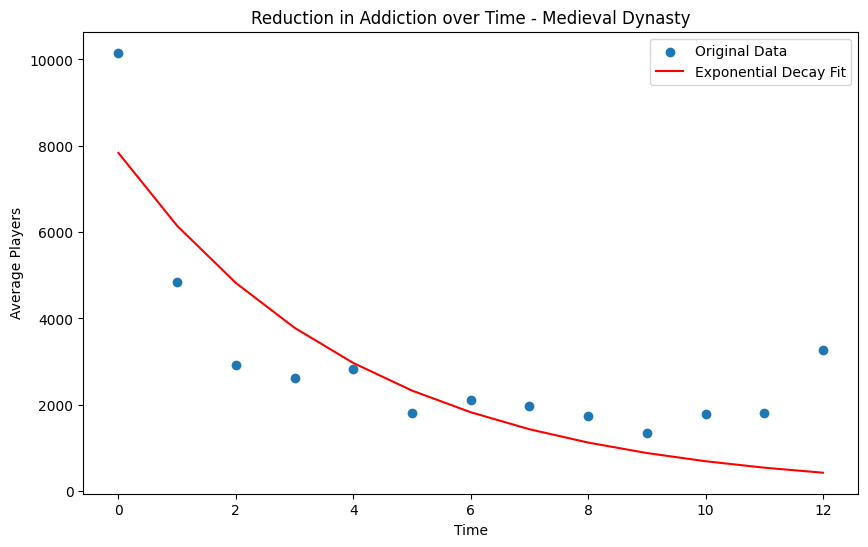

Game: Medieval Dynasty
Decay Rate: 0.24258005007857594
-----------------------------


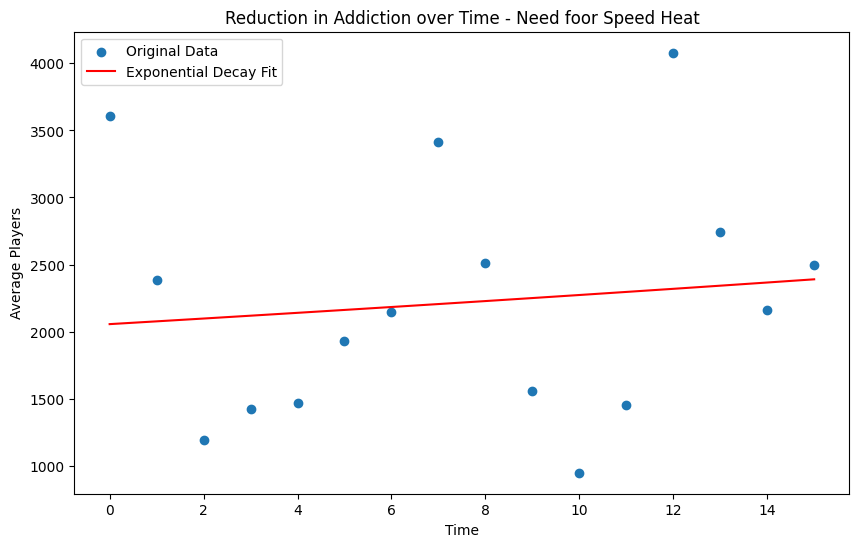

Game: Need foor Speed Heat
Decay Rate: -0.010037439422693254
-----------------------------


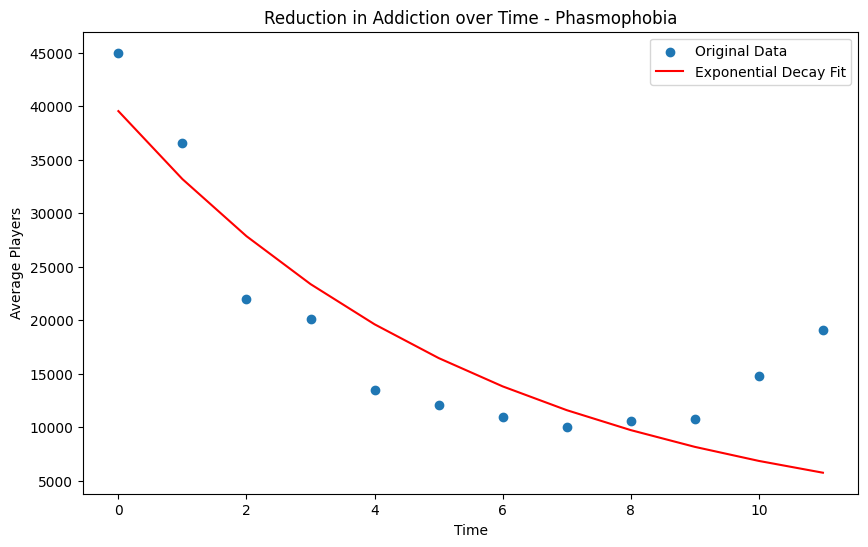

Game: Phasmophobia
Decay Rate: 0.17515961806742178
-----------------------------


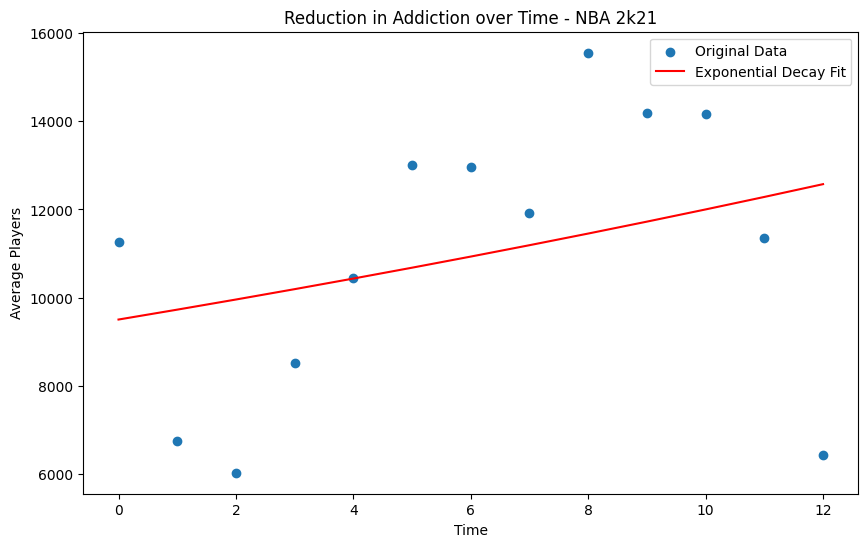

Game: NBA 2k21
Decay Rate: -0.0233114854876059
-----------------------------


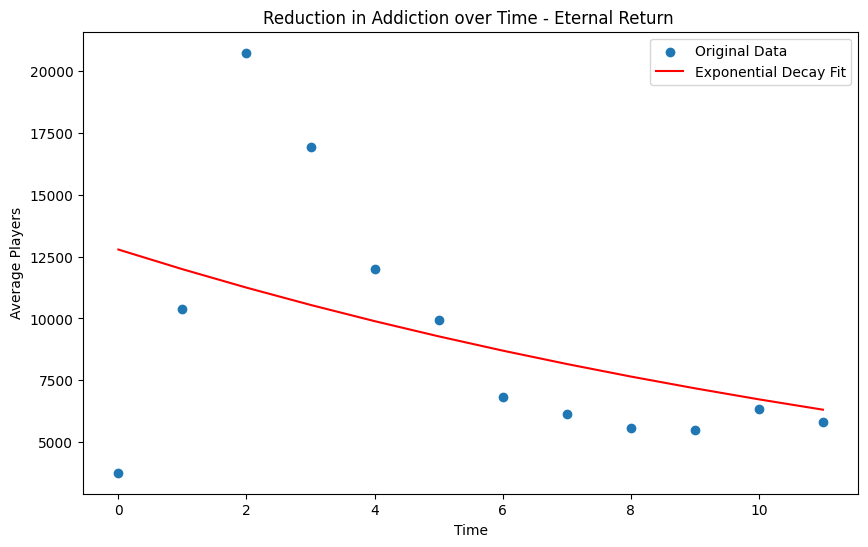

Game: Eternal Return 
Decay Rate: 0.06410236162406
-----------------------------


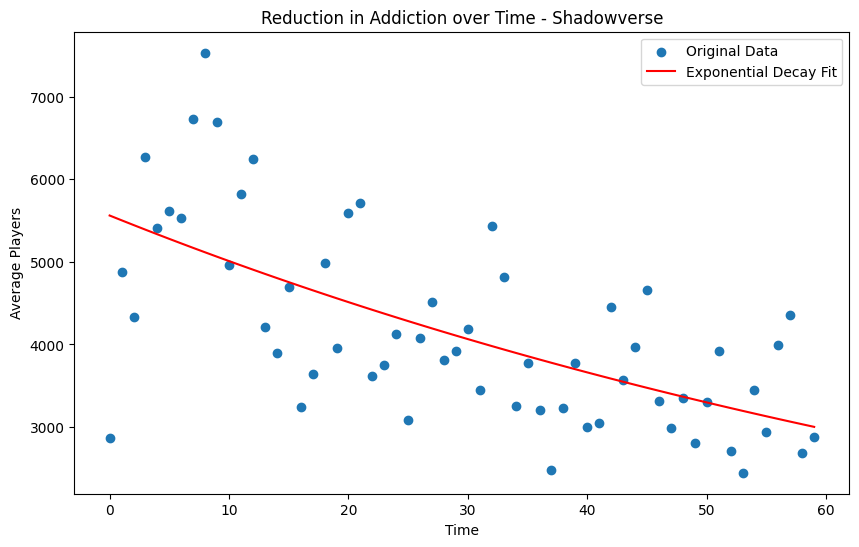

Game: Shadowverse
Decay Rate: 0.01044949615588905
-----------------------------


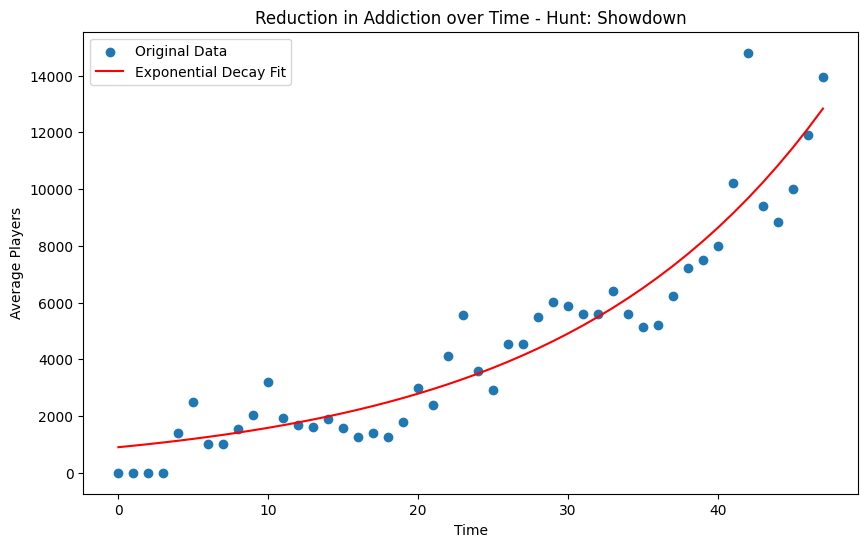

Game: Hunt: Showdown
Decay Rate: -0.05654696358896025
-----------------------------


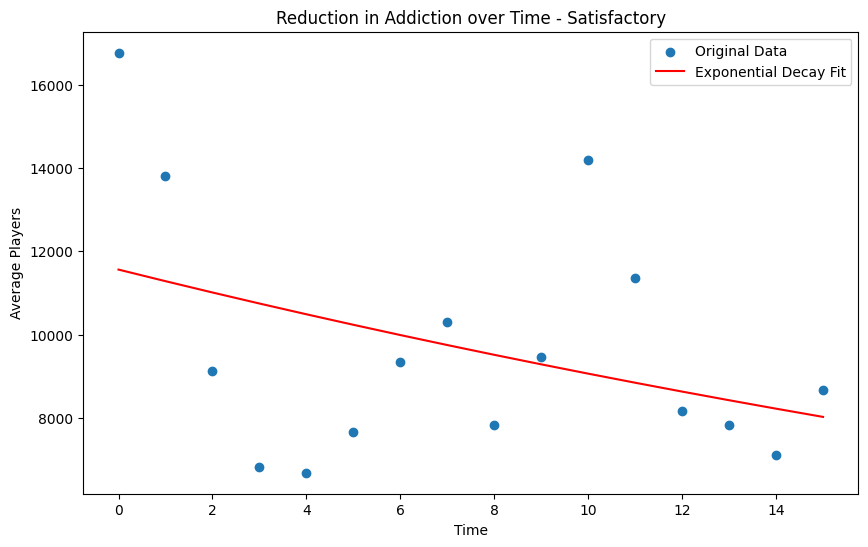

Game: Satisfactory
Decay Rate: 0.024366131797023127
-----------------------------


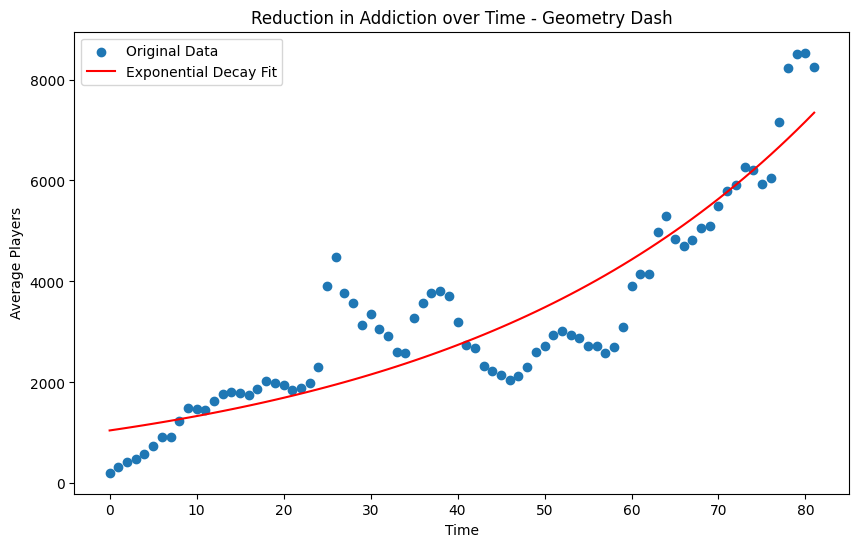

Game: Geometry Dash
Decay Rate: -0.02403714026657328
-----------------------------


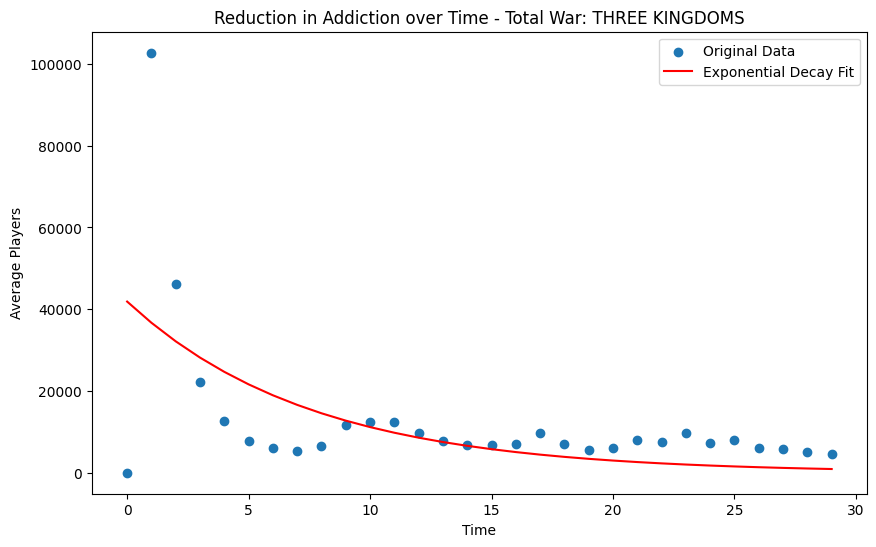

Game: Total War: THREE KINGDOMS
Decay Rate: 0.13218632881275427
-----------------------------


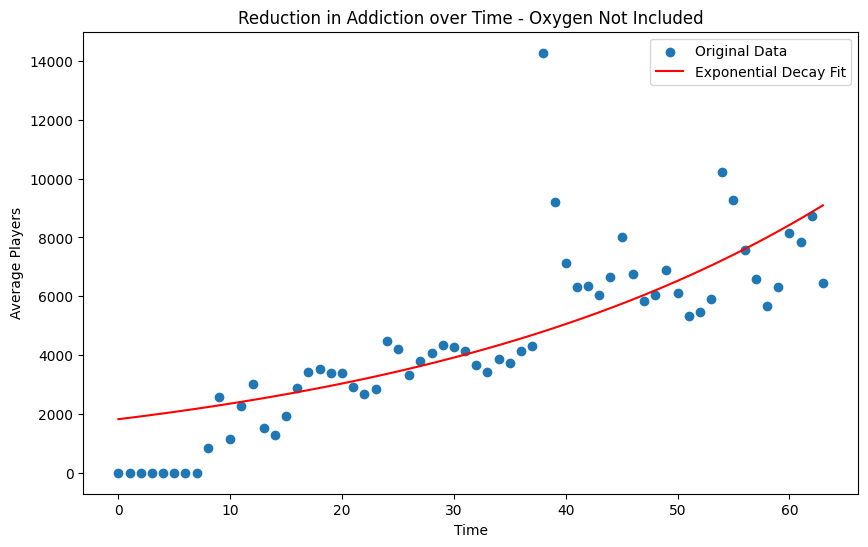

Game: Oxygen Not Included
Decay Rate: -0.025525183889346104
-----------------------------


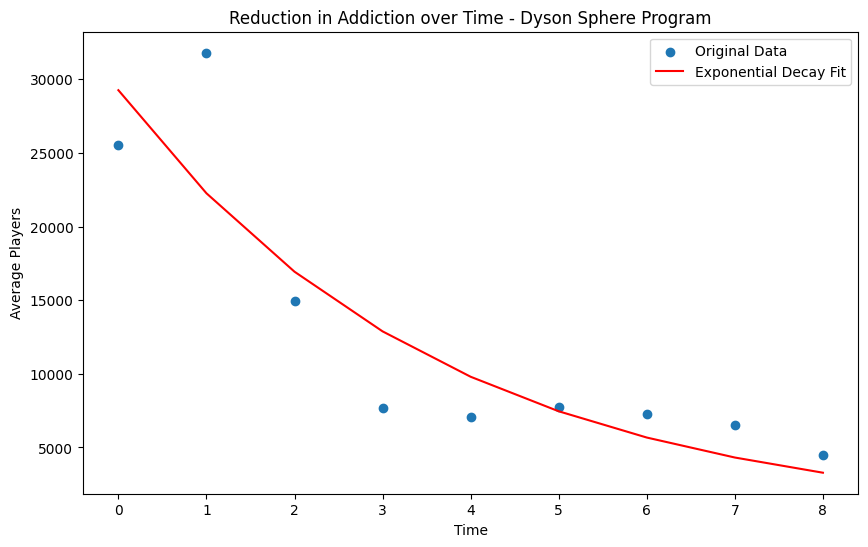

Game: Dyson Sphere Program
Decay Rate: 0.2735081887237008
-----------------------------


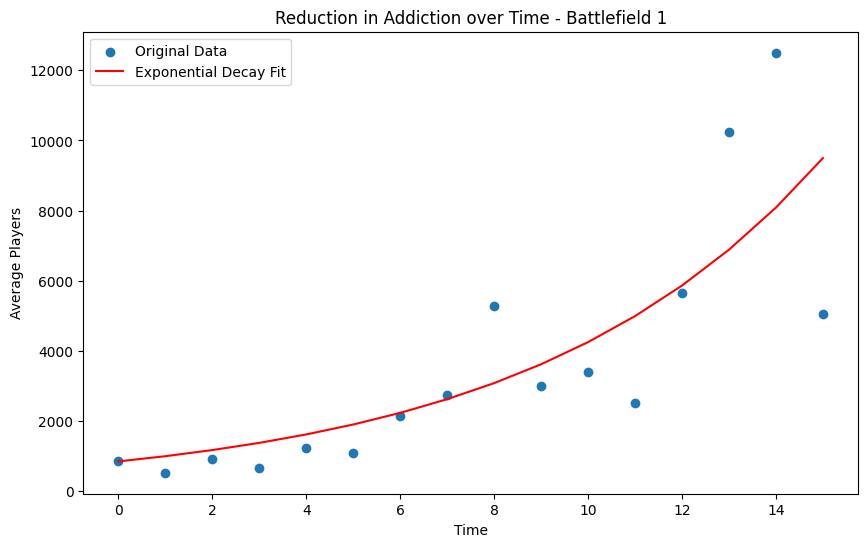

Game: Battlefield 1
Decay Rate: -0.16070413527463792
-----------------------------


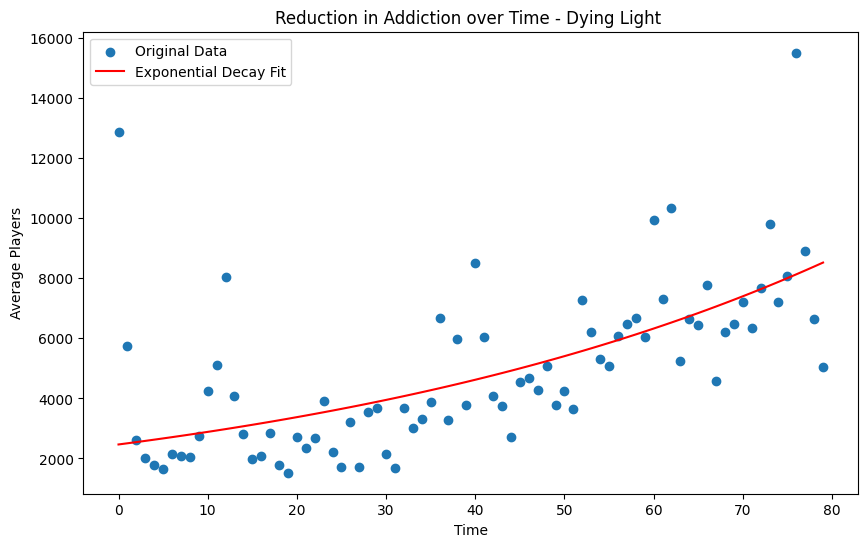

Game: Dying Light 
Decay Rate: -0.015698166567151756
-----------------------------


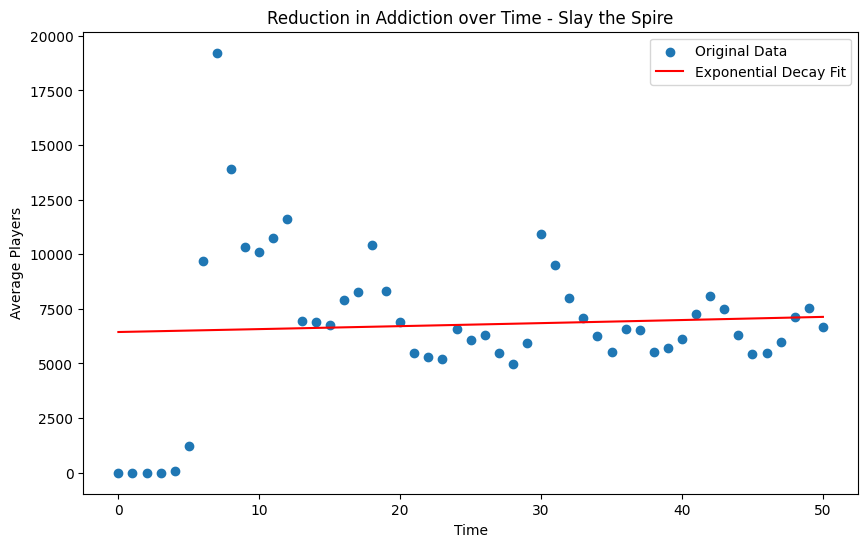

Game: Slay the Spire
Decay Rate: -0.0020418002178324117
-----------------------------


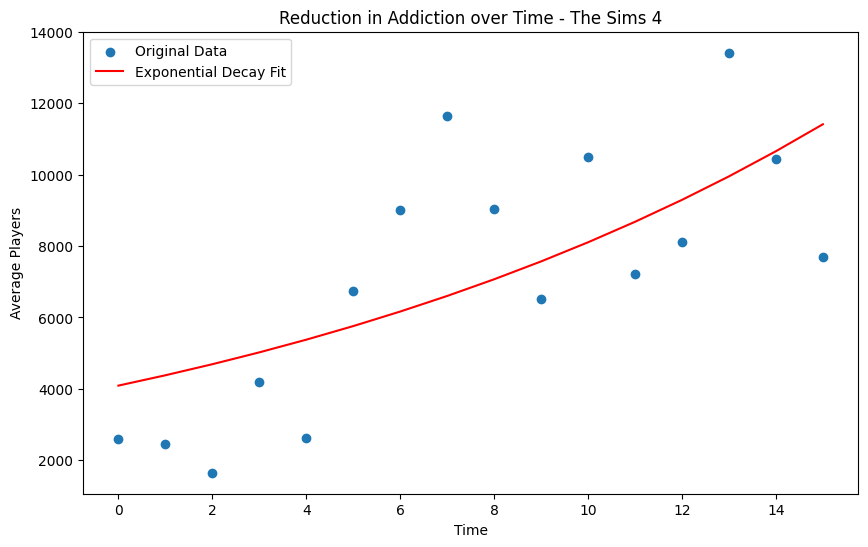

Game: The Sims 4
Decay Rate: -0.06847122608942367
-----------------------------


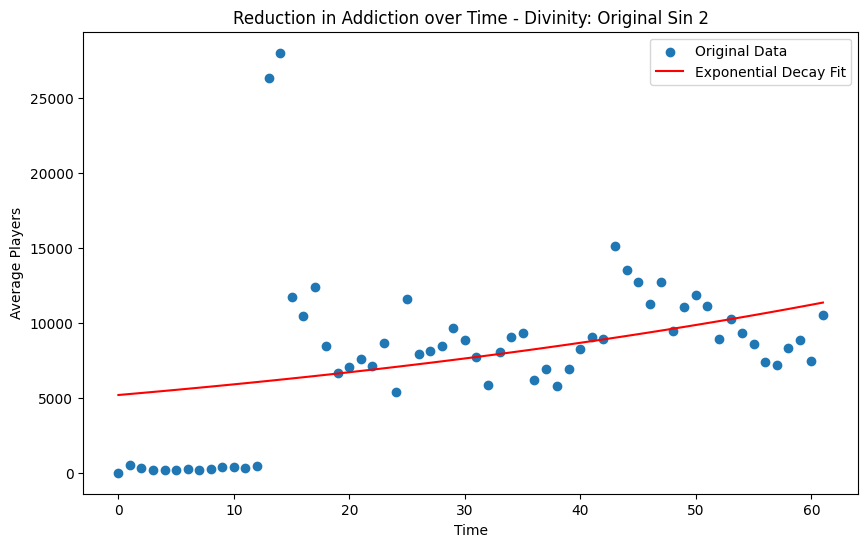

Game: Divinity: Original Sin 2
Decay Rate: -0.01283313670378084
-----------------------------


In [ ]:
#With all unique games separately
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# dataset
data = pd.read_csv('/content/Valve_Player_Data.csv')

# We have to convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# We prepare a list of distinct games
distinct_games = data['Game_Name'].unique()

# Exponential decay function
def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

# Fitting and plotting exponential decay curves for each distinct game
for game in distinct_games:
    game_data = data[data['Game_Name'] == game]
    game_data = game_data.sort_values('Date')

    x = np.arange(len(game_data))
    y = game_data['Avg_players']

    try:
        popt, pcov = curve_fit(exponential_decay, x, y)
        decay_rate = popt[1]

        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, label='Original Data')
        plt.plot(x, exponential_decay(x, *popt), 'r-', label='Exponential Decay Fit')
        plt.xlabel('Time')
        plt.ylabel('Average Players')
        plt.title(f'Reduction in Addiction over Time - {game}')
        plt.legend()
        plt.show()

        print(f'Game: {game}')
        print('Decay Rate:', decay_rate)
        print('-----------------------------')
    except:
        print(f'Error fitting exponential decay for {game}')
        print('-----------------------------')


<ipython-input-6-44989cff3fb1>:137: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


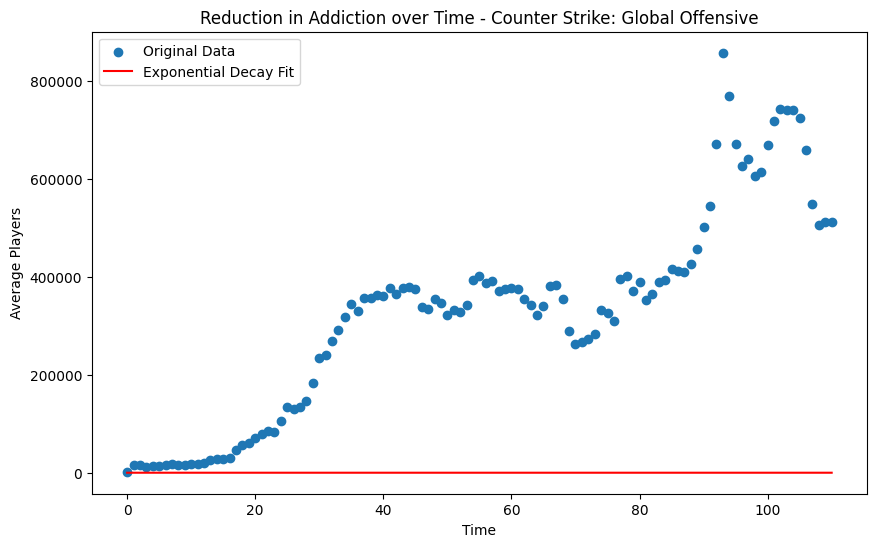

Game: Counter Strike: Global Offensive
Decay Rate: 0.7686163212445642
-----------------------------


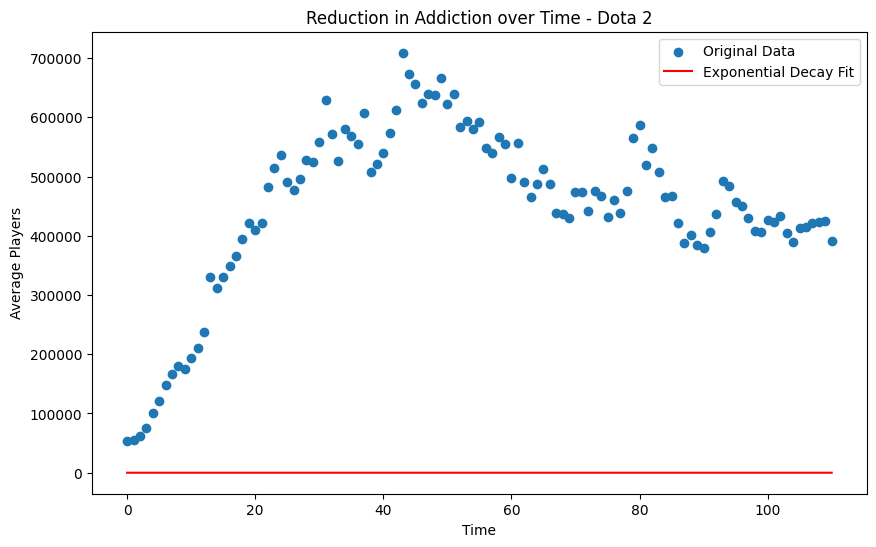

Game: Dota 2
Decay Rate: 0.7936041406674761
-----------------------------


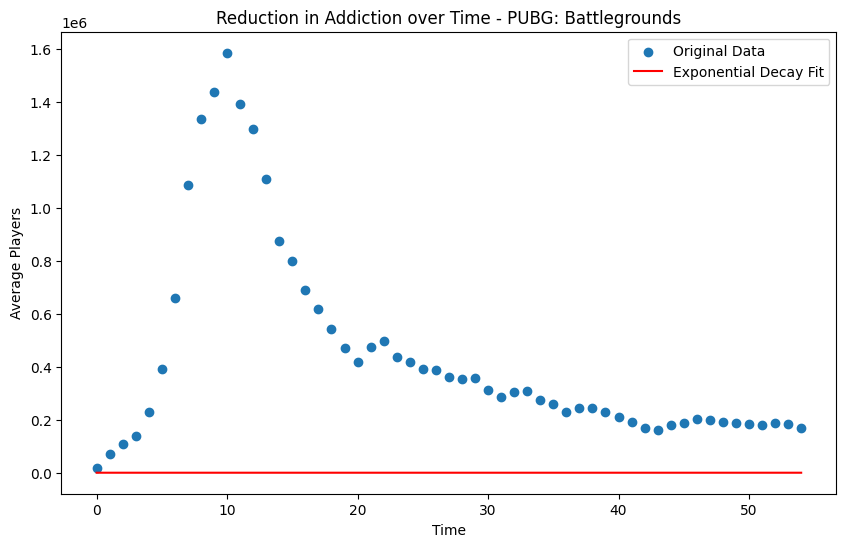

Game: PUBG: Battlegrounds
Decay Rate: 0.7663653638786007
-----------------------------
Skipping Apex Legends (negative, zero, or small decay rate)
-----------------------------
Skipping Team Fortress 2 (negative, zero, or small decay rate)
-----------------------------
Skipping Grand Theft Auto V (negative, zero, or small decay rate)
-----------------------------
Skipping NARAKA: BLADEPOINT (negative, zero, or small decay rate)
-----------------------------
Skipping Wallpaper Engine (negative, zero, or small decay rate)
-----------------------------
Skipping Rust (negative, zero, or small decay rate)
-----------------------------
Skipping Destiny 2 (negative, zero, or small decay rate)
-----------------------------
Skipping Warframe (negative, zero, or small decay rate)
-----------------------------
Error fitting exponential decay for Cookie Clicker
-----------------------------
Skipping Tom Clancy's Rainbow Six Seige (negative, zero, or small decay rate)
-----------------------------


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-6-44989cff3fb1>:137: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


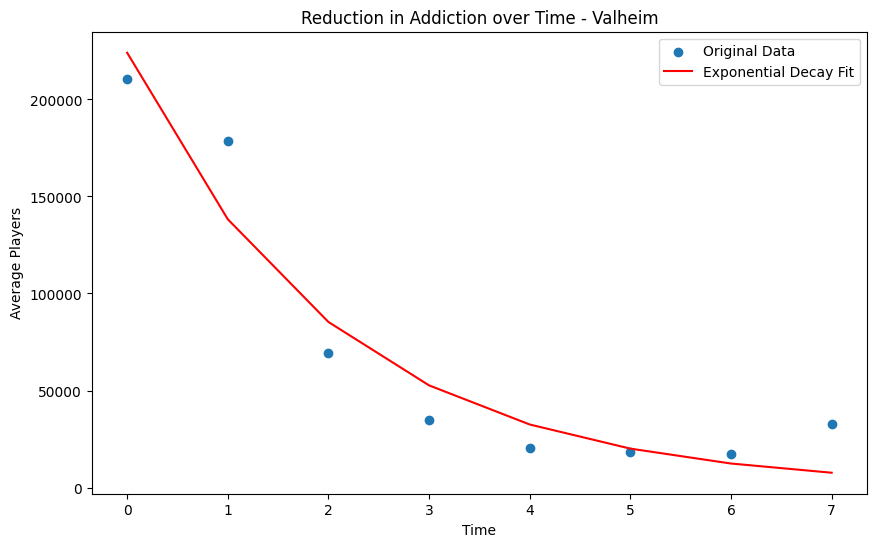

Game: Valheim
Decay Rate: 0.48280203892512896
-----------------------------
Skipping World of Tanks Blitz (negative, zero, or small decay rate)
-----------------------------


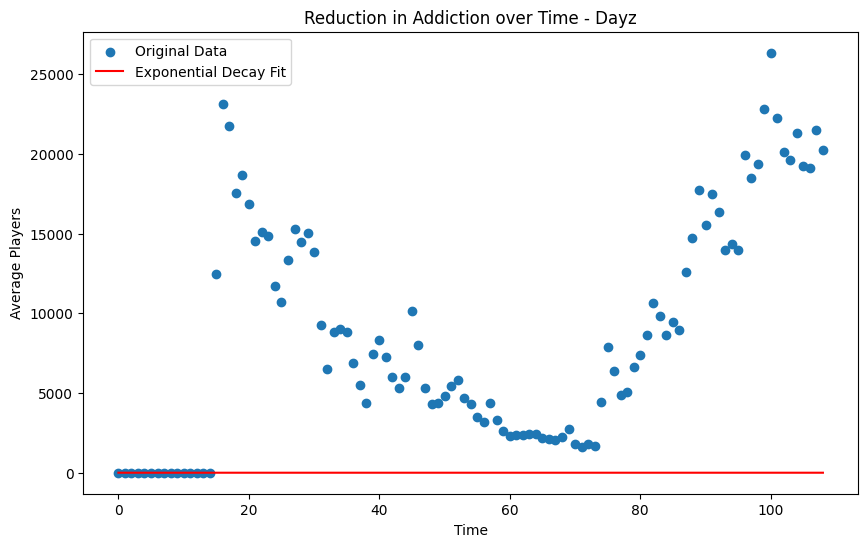

Game: Dayz
Decay Rate: 0.9157769805457863
-----------------------------
Skipping Total War: WARHAMMER II (negative, zero, or small decay rate)
-----------------------------
Skipping Don't Starve Together (negative, zero, or small decay rate)
-----------------------------
Skipping Euro Truck Simulator 2 (negative, zero, or small decay rate)
-----------------------------
Skipping Rocket League (negative, zero, or small decay rate)
-----------------------------
Skipping Garry's Mod (negative, zero, or small decay rate)
-----------------------------
Skipping Monster Hunter: World (negative, zero, or small decay rate)
-----------------------------
Skipping Stardew Valley (negative, zero, or small decay rate)
-----------------------------
Skipping FINAL FANTASY XIV Online (negative, zero, or small decay rate)
-----------------------------


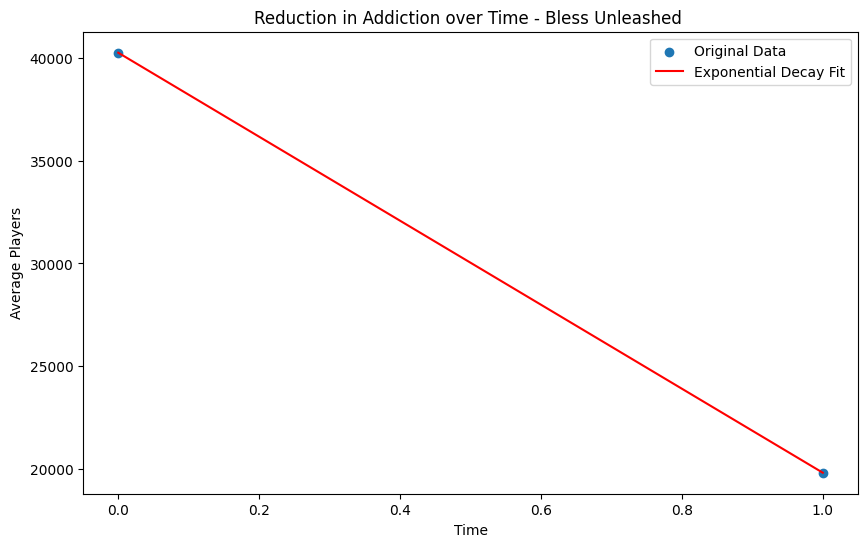

Game: Bless Unleashed 
Decay Rate: 0.7093772935979193
-----------------------------
Skipping The Witcher 3: Wild Hunt (negative, zero, or small decay rate)
-----------------------------
Skipping 雀魂麻将(MahjongSoul) (negative, zero, or small decay rate)
-----------------------------
Skipping RimWorld (negative, zero, or small decay rate)
-----------------------------
Skipping Red Dead Redemption 2 (negative, zero, or small decay rate)
-----------------------------
Skipping 7 Days to Die (negative, zero, or small decay rate)
-----------------------------
Skipping Black Desert (negative, zero, or small decay rate)
-----------------------------
Skipping Cities: Skylines (negative, zero, or small decay rate)
-----------------------------
Skipping Sid Meier's Civilization V (negative, zero, or small decay rate)
-----------------------------
Skipping Farming Simulator 19 (negative, zero, or small decay rate)
-----------------------------
Skipping The Elder Scrolls V: Skyrim Special Edition (neg

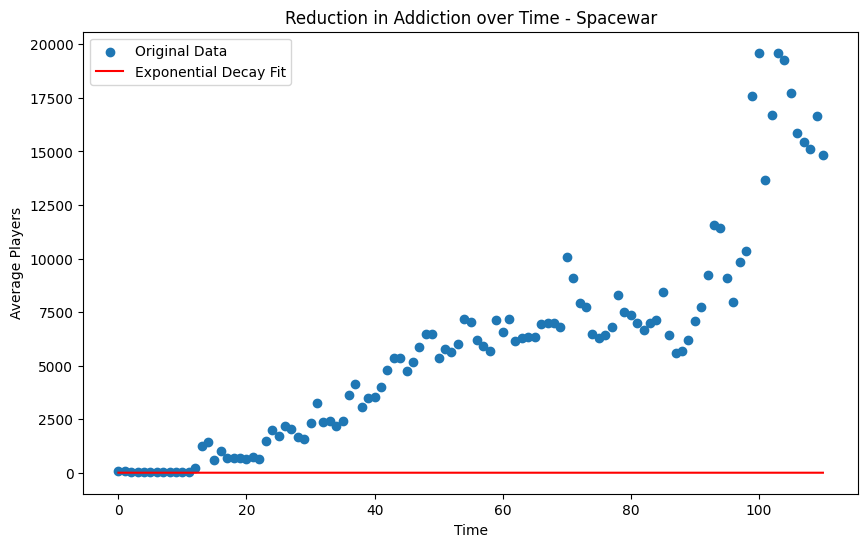

Game: Spacewar
Decay Rate: 0.8519925161838386
-----------------------------
Skipping Age of Empires II: Definitive Edition (negative, zero, or small decay rate)
-----------------------------
Error fitting exponential decay for Pathfinder: Wrath of Righteous
-----------------------------
Skipping Yu-Gi-Oh! Duel Links (negative, zero, or small decay rate)
-----------------------------
Skipping The Binding of Isaac: Rebirth (negative, zero, or small decay rate)
-----------------------------


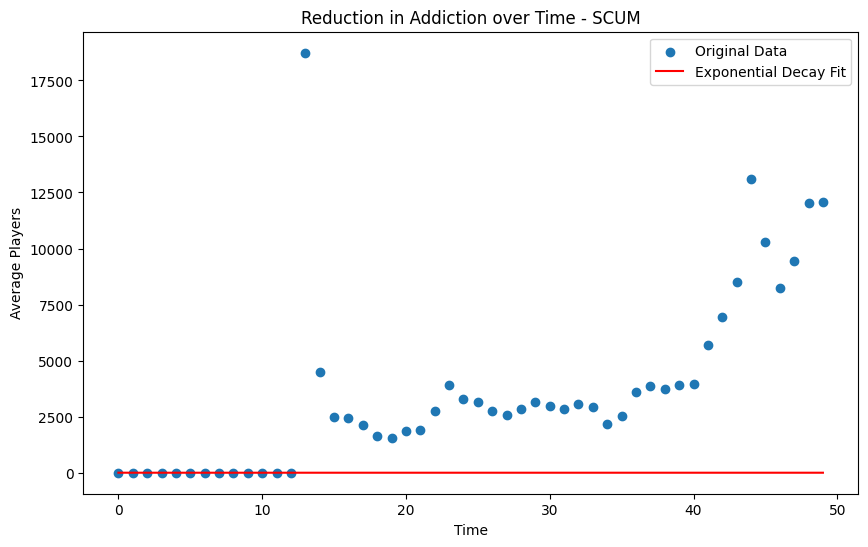

Game: SCUM
Decay Rate: 0.7638129278256108
-----------------------------


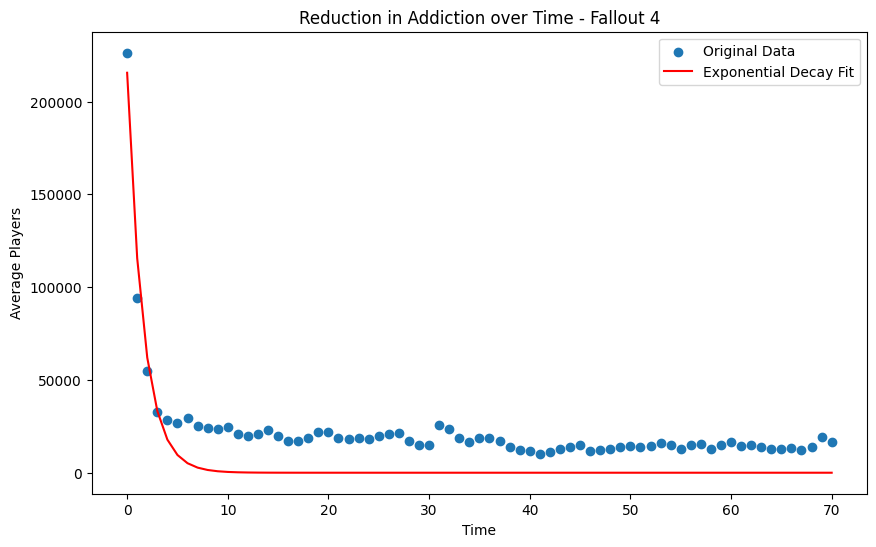

Game: Fallout 4
Decay Rate: 0.6230558001784499
-----------------------------
Skipping Factorio (negative, zero, or small decay rate)
-----------------------------
Skipping Mount & Blade II: Bannerlord  (negative, zero, or small decay rate)
-----------------------------
Skipping tModLoader (negative, zero, or small decay rate)
-----------------------------
Error fitting exponential decay for NBA 2k22
-----------------------------
Skipping Bloons TD 6 (negative, zero, or small decay rate)
-----------------------------
Skipping Brawlhalla (negative, zero, or small decay rate)
-----------------------------


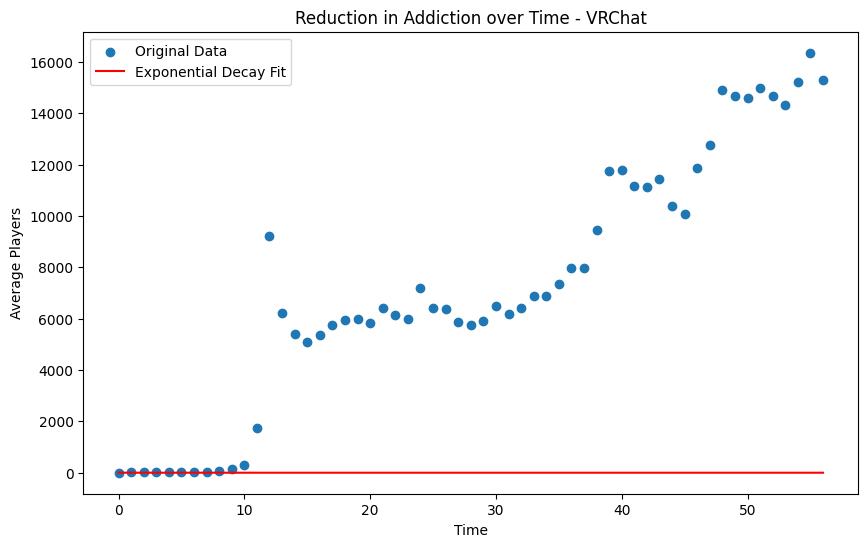

Game: VRChat
Decay Rate: 0.8769066899663139
-----------------------------


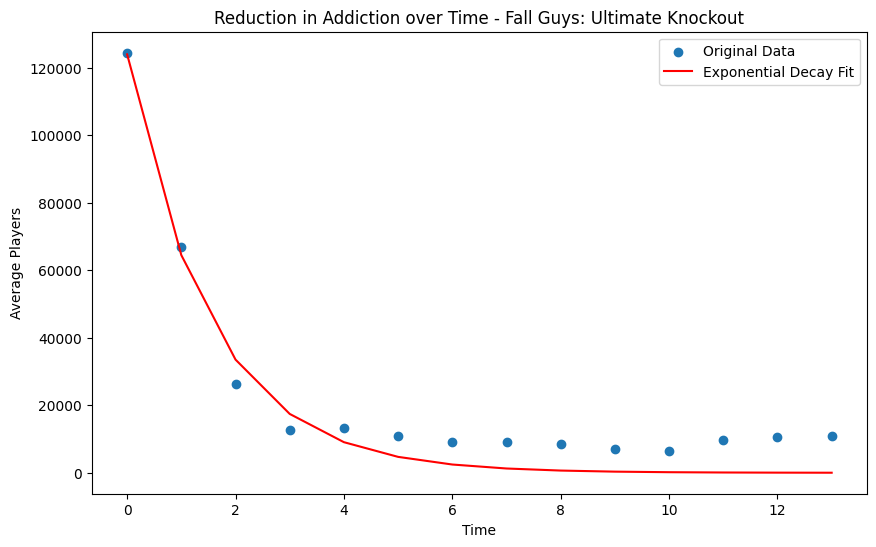

Game: Fall Guys: Ultimate Knockout
Decay Rate: 0.6537034008459173
-----------------------------
Skipping Arma 3 (negative, zero, or small decay rate)
-----------------------------
Skipping Football Manager 2020 (negative, zero, or small decay rate)
-----------------------------
Skipping World of Warships (negative, zero, or small decay rate)
-----------------------------
Skipping EA SPORTS FIFA 21 (negative, zero, or small decay rate)
-----------------------------
Skipping DARK SOULS III (negative, zero, or small decay rate)
-----------------------------


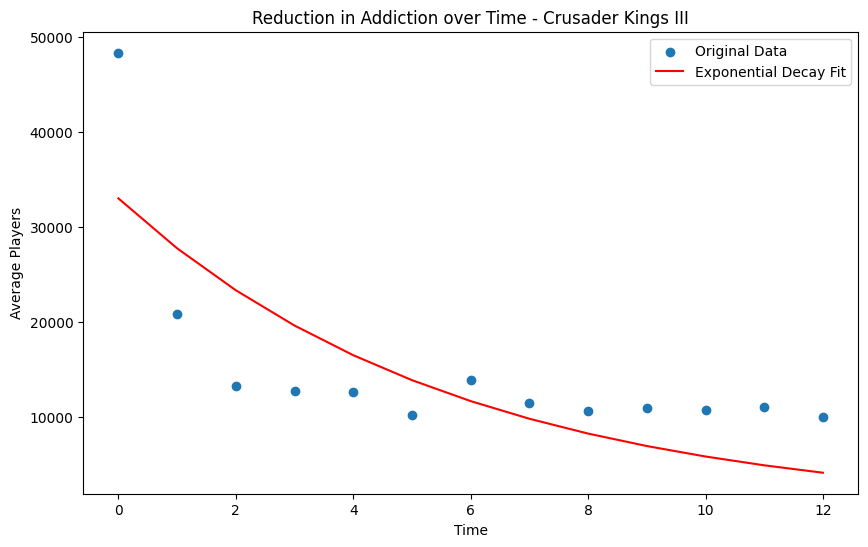

Game: Crusader Kings III
Decay Rate: 0.1734306139825831
-----------------------------
Skipping Conqueror's Blade (negative, zero, or small decay rate)
-----------------------------
Skipping No Man's Sky (negative, zero, or small decay rate)
-----------------------------
Skipping eFootball PES 2021 SEASON UPDATE (negative, zero, or small decay rate)
-----------------------------
Skipping Sea of Thieves (negative, zero, or small decay rate)
-----------------------------
Skipping Counter-Strike (negative, zero, or small decay rate)
-----------------------------
Error fitting exponential decay for Tales of Arise
-----------------------------
Skipping Path of Exile (negative, zero, or small decay rate)
-----------------------------
Skipping Soundpad (negative, zero, or small decay rate)
-----------------------------


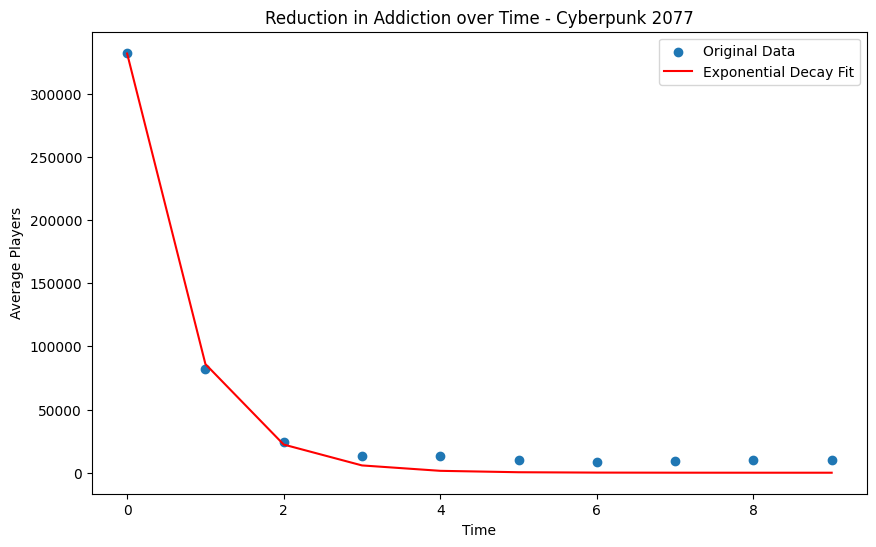

Game: Cyberpunk 2077
Decay Rate: 1.350056698254501
-----------------------------


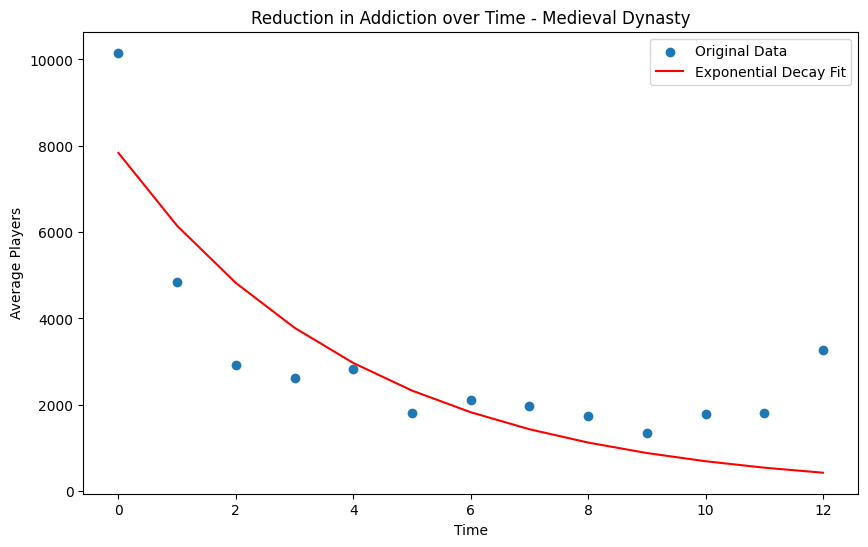

Game: Medieval Dynasty
Decay Rate: 0.24258005007857594
-----------------------------
Skipping Need foor Speed Heat (negative, zero, or small decay rate)
-----------------------------


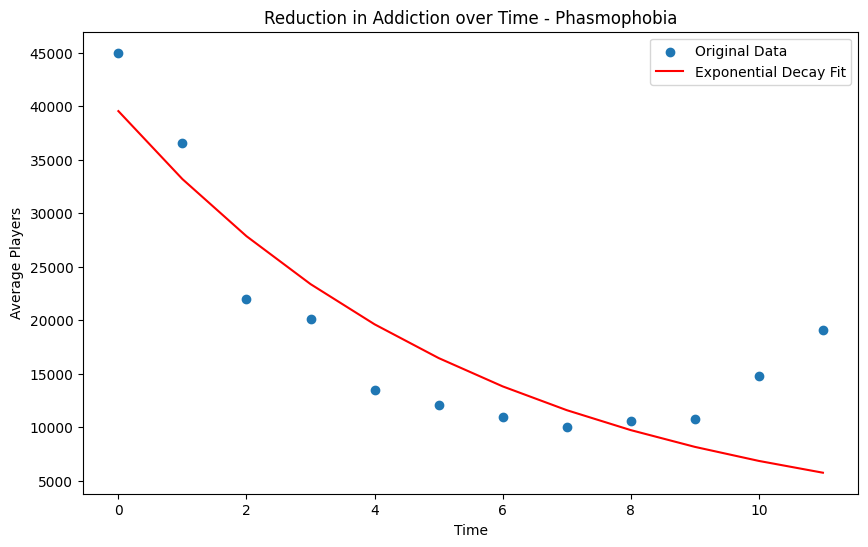

Game: Phasmophobia
Decay Rate: 0.17515961806742178
-----------------------------
Skipping NBA 2k21 (negative, zero, or small decay rate)
-----------------------------
Skipping Eternal Return  (negative, zero, or small decay rate)
-----------------------------
Skipping Shadowverse (negative, zero, or small decay rate)
-----------------------------
Skipping Hunt: Showdown (negative, zero, or small decay rate)
-----------------------------
Skipping Satisfactory (negative, zero, or small decay rate)
-----------------------------
Skipping Geometry Dash (negative, zero, or small decay rate)
-----------------------------
Skipping Total War: THREE KINGDOMS (negative, zero, or small decay rate)
-----------------------------
Skipping Oxygen Not Included (negative, zero, or small decay rate)
-----------------------------


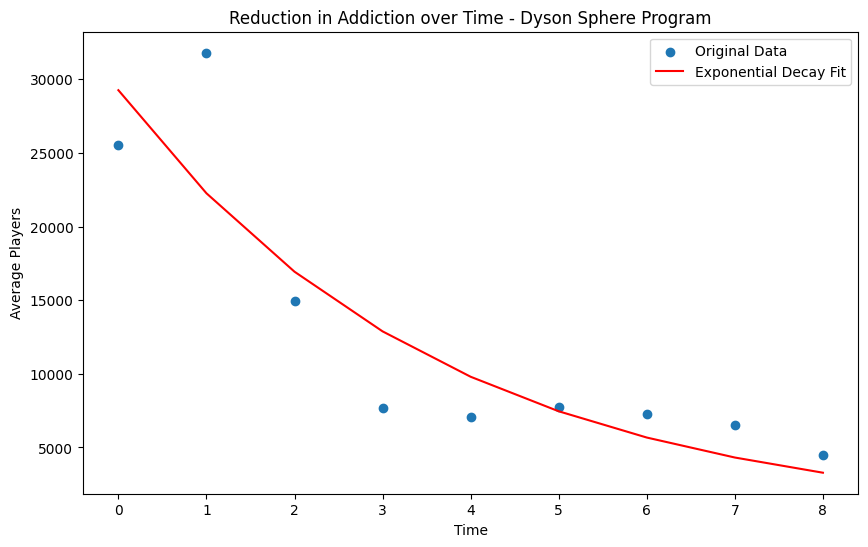

Game: Dyson Sphere Program
Decay Rate: 0.2735081887237008
-----------------------------
Skipping Battlefield 1 (negative, zero, or small decay rate)
-----------------------------
Skipping Dying Light  (negative, zero, or small decay rate)
-----------------------------
Skipping Slay the Spire (negative, zero, or small decay rate)
-----------------------------
Skipping The Sims 4 (negative, zero, or small decay rate)
-----------------------------
Skipping Divinity: Original Sin 2 (negative, zero, or small decay rate)
-----------------------------
Average Exponential Decay Rate for Positive Cases: 0.6512967901853992


In [ ]:
#With games that shows exponential decay behaviour only. These are the ones we are interested in!

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the dataset
data = pd.read_csv('/content/Valve_Player_Data.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Get a list of distinct games
distinct_games = data['Game_Name'].unique()

# Define the exponential decay function
def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

# Fit and plot exponential decay curves for each distinct game
for game in distinct_games:
    game_data = data[data['Game_Name'] == game]
    game_data = game_data.sort_values('Date')

    x = np.arange(len(game_data))
    y = game_data['Avg_players']

    try:
        popt, pcov = curve_fit(exponential_decay, x, y)
        decay_rate = popt[1]

        # Check if decay rate is positive
        if decay_rate > 0:
            plt.figure(figsize=(10, 6))
            plt.scatter(x, y, label='Original Data')
            plt.plot(x, exponential_decay(x, *popt), 'r-', label='Exponential Decay Fit')
            plt.xlabel('Time')
            plt.ylabel('Average Players')
            plt.title(f'Reduction in Addiction over Time - {game}')
            plt.legend()
            plt.show()

            print(f'Game: {game}')
            print('Decay Rate:', decay_rate)
            print('-----------------------------')
        else:
            print(f'Skipping {game} (negative or zero decay rate)')
            print('-----------------------------')
    except:
        print(f'Error fitting exponential decay for {game}')
        print('-----------------------------')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the dataset
data = pd.read_csv('/content/Valve_Player_Data.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Get a list of distinct games
distinct_games = data['Game_Name'].unique()

# Define the exponential decay function
def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

# Initialize a list to store decay rates of games showing positive exponential decay
positive_decay_rates = []

# Fit and plot exponential decay curves for each distinct game
for game in distinct_games:
    game_data = data[data['Game_Name'] == game]
    game_data = game_data.sort_values('Date')

    x = np.arange(len(game_data))
    y = game_data['Avg_players']

    try:
        popt, pcov = curve_fit(exponential_decay, x, y)
        decay_rate = popt[1]

        # Check if decay rate is positive
        if decay_rate > 0:
            positive_decay_rates.append(decay_rate)

            plt.figure(figsize=(10, 6))
            plt.scatter(x, y, label='Original Data')
            plt.plot(x, exponential_decay(x, *popt), 'r-', label='Exponential Decay Fit')
            plt.xlabel('Time')
            plt.ylabel('Average Players')
            plt.title(f'Reduction in Addiction over Time - {game}')
            plt.legend()
            plt.show()

            print(f'Game: {game}')
            print('Decay Rate:', decay_rate)
            print('-----------------------------')
        else:
            print(f'Skipping {game} (negative or zero decay rate)')
            print('-----------------------------')
    except:
        print(f'Error fitting exponential decay for {game}')
        print('-----------------------------')

# Calculate the average decay rate of games exhibiting positive exponential decay
if positive_decay_rates:
    average_decay_rate = np.mean(positive_decay_rates)
    print('Average Exponential Decay Rate for Positive Cases:', average_decay_rate)
else:
    print('No games exhibited positive exponential decay.')
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# dataset
data = pd.read_csv('/content/Valve_Player_Data.csv')

# We have to convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# We prepare a list of distinct games
distinct_games = data['Game_Name'].unique()

# Exponential decay function
def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

# We initialize a list to store decay rates of games showing positive exponential decay
positive_decay_rates = []

# Threshold to neglect small decay rates
threshold = 0.15

# Fitting and plotting exponential decay curves for each distinct game
for game in distinct_games:
    game_data = data[data['Game_Name'] == game]
    game_data = game_data.sort_values('Date')

    x = np.arange(len(game_data))
    y = game_data['Avg_players']

    try:
        popt, pcov = curve_fit(exponential_decay, x, y)
        decay_rate = popt[1]

        # is the decay rate positive and above threshold level?
        if decay_rate > threshold:
            positive_decay_rates.append(decay_rate)

            plt.figure(figsize=(10, 6))
            plt.scatter(x, y, label='Original Data')
            plt.plot(x, exponential_decay(x, *popt), 'r-', label='Exponential Decay Fit')
            plt.xlabel('Time')
            plt.ylabel('Average Players')
            plt.title(f'Reduction in Addiction over Time - {game}')
            plt.legend()
            plt.show()

            print(f'Game: {game}')
            print('Decay Rate:', decay_rate)
            print('-----------------------------')
        else:
            print(f'Skipping {game} (negative, zero, or small decay rate)')
            print('-----------------------------')
    except:
        print(f'Error fitting exponential decay for {game}')
        print('-----------------------------')

# And lastly we calculate the average decay rate of games exhibiting positive exponential decay
if positive_decay_rates:
    average_decay_rate = np.mean(positive_decay_rates)
    print('Average Exponential Decay Rate for Positive Cases:', average_decay_rate)
else:
    print('No games exhibited positive exponential decay.')
